In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K
import keras.layers as layers
from keras.models import Model
from keras import Sequential
from keras.layers import Lambda, Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import pandas as pd
from sklearn import preprocessing
from matplotlib import gridspec
from matplotlib import patches

plt.rcParams["font.family"] = "serif"

Using TensorFlow backend.
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

## Gaussian example

In [3]:
epsilon = 0.1
N = 100000

myoneD_signal = np.random.normal(epsilon,1,N)
myoneD_background = np.random.normal(-epsilon,1,N)

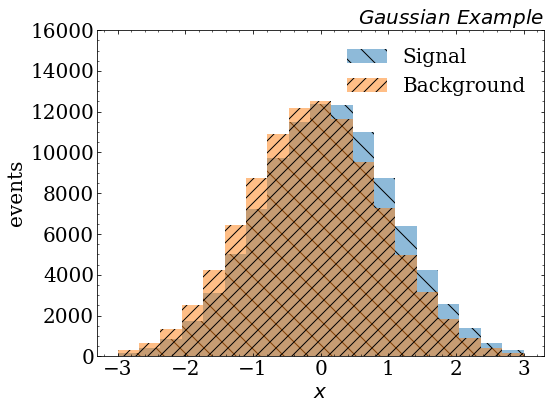

In [630]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(myoneD_signal,bins=np.linspace(-3,3,20),alpha=0.5,label="Signal",hatch='\\')
plt.hist(myoneD_background,bins=np.linspace(-3,3,20),alpha=0.5,label="Background",hatch='//')
plt.ylim([0,16000])
plt.xlabel("$x$",fontsize=20)
plt.ylabel("events",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.title(r"$Gaussian$ $Example$",loc="right",fontsize=20)
plt.savefig("ensembleLearnPlots/Gaussian_Xhist.pdf",bbox_inches='tight')

In [5]:
X_1D = np.concatenate([myoneD_signal,myoneD_background])
Y_1D = np.concatenate([np.ones(len(myoneD_signal)),np.zeros(len(myoneD_background))])

n = 10
if (N % n != 0):
    print("That is not a valid choice!")
    
X_nD = np.reshape(X_1D,[int(len(X_1D)/n),n])
Y_nD = np.concatenate([np.ones(int(len(myoneD_signal)/n)),np.zeros(int(len(myoneD_background)/n))])

X_1D_train, X_1D_val, Y_1D_train, Y_1D_val = train_test_split(X_1D, Y_1D, test_size=0.5)
X_nD_train, X_nD_val, Y_nD_train, Y_nD_val = train_test_split(X_nD, Y_nD, test_size=0.5)

In [746]:
model1D = Sequential()
model1D.add(Dense(128, activation='relu',input_shape =(1,))) 
model1D.add(Dense(128, activation='relu'))
model1D.add(Dense(1, activation='sigmoid'))
model1D.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_model1D= model1D.fit(X_1D_train, Y_1D_train, epochs=10, batch_size=int(0.1*len(X_1D_train)),validation_data=(X_1D_val, Y_1D_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 1s 10us/step - loss: 0.6930 - acc: 0.5131 - val_loss: 0.6893 - val_acc: 0.5390
Epoch 2/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6893 - acc: 0.5388 - val_loss: 0.6885 - val_acc: 0.5388
Epoch 3/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6884 - acc: 0.5386 - val_loss: 0.6886 - val_acc: 0.5389
Epoch 4/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5386 - val_loss: 0.6885 - val_acc: 0.5390
Epoch 5/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5387 - val_loss: 0.6884 - val_acc: 0.5387
Epoch 6/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5389 - val_loss: 0.6885 - val_acc: 0.5388
Epoch 7/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884

In [7]:
modelnD = Sequential()
modelnD.add(Dense(128, activation='relu',input_shape =(n,))) 
modelnD.add(Dense(128, activation='relu'))
modelnD.add(Dense(1, activation='sigmoid'))
modelnD.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_modelnD= modelnD.fit(X_nD_train, Y_nD_train, epochs=2, batch_size=128,validation_data=(X_nD_val, Y_nD_val))

Train on 10000 samples, validate on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 1s 79us/step - loss: 0.6573 - acc: 0.5991 - val_loss: 0.6472 - val_acc: 0.6160
Epoch 2/2
10000/10000 [==============================] - 0s 49us/step - loss: 0.6481 - acc: 0.6126 - val_loss: 0.6463 - val_acc: 0.6217


In [8]:
scores_1D = model1D.predict(X_1D_val)
scores_nD = modelnD.predict(X_nD_val)

In [9]:
scores_1D_fromnD = model1D.predict(np.reshape(X_nD_val,[n*len(X_nD_val)]))

In [10]:
scores_1D_fromnD = np.reshape(scores_1D_fromnD,[int(len(scores_1D_fromnD)/n),n])

In [11]:
scaled_up = np.array([np.prod(scores_1D_fromnD[i,:] / (1.-scores_1D_fromnD[i,:])) for i in range(len(scores_1D_fromnD))])

In [12]:
fpr_1D, tpr_1D, _ = roc_curve(Y_1D_val, scores_1D)
fpr_nD, tpr_nD, _ = roc_curve(Y_nD_val, scores_nD)
fpr_nD_from1D, tpr_nD_from1D, _ = roc_curve(Y_nD_val, scaled_up)

In [137]:
#Save everything
np.save("ensemblelearning/Y_1D_val",Y_1D_val)
np.save("ensemblelearning/X_1D_val",Y_1D_val)
np.save("ensemblelearning/Y_1D_train",Y_1D_train)
np.save("ensemblelearning/X_1D_train",X_1D_train)

np.save("ensemblelearning/Y_nD_val",Y_nD_val)
np.save("ensemblelearning/X_nD_val",Y_nD_val)
np.save("ensemblelearning/Y_nD_train",Y_nD_train)
np.save("ensemblelearning/X_nD_train",X_nD_train)

model_json = model1D.to_json()
with open("ensemblelearning/model1D.json", "w") as json_file:
    json_file.write(model_json)
model1D.save_weights("ensemblelearning/model1D.h5")

model_json = modelnD.to_json()
with open("ensemblelearning/modelnD.json", "w") as json_file:
    json_file.write(model_json)
modelnD.save_weights("ensemblelearning/modelnD.h5")

In [138]:
#Load everything
Y_1D_val = np.load("ensemblelearning/Y_1D_val.npy")
Y_1D_val = np.load("ensemblelearning/X_1D_val.npy")
Y_1D_train = np.load("ensemblelearning/Y_1D_train.npy")
X_1D_train = np.load("ensemblelearning/X_1D_train.npy")

Y_nD_val = np.load("ensemblelearning/Y_nD_val.npy")
Y_nD_val = np.load("ensemblelearning/X_nD_val.npy")
Y_nD_train = np.load("ensemblelearning/Y_nD_train.npy")
X_nD_train = np.load("ensemblelearning/X_nD_train.npy")

json_file = open('ensemblelearning/model1D.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model1D = model_from_json(loaded_model_json)
model1D.load_weights("ensemblelearning/model1D.h5")

json_file = open('ensemblelearning/modelnD.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
modelnD = model_from_json(loaded_model_json)
modelnD.load_weights("ensemblelearning/modelnD.h5")

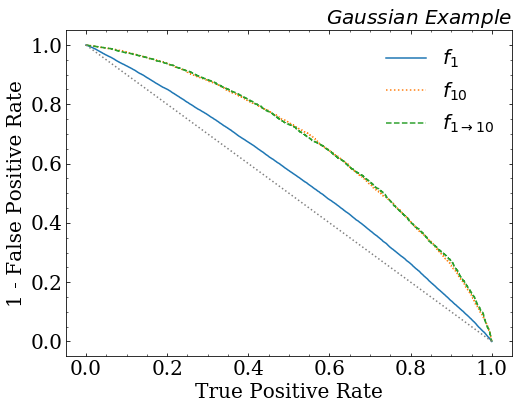

In [632]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_1D,1-fpr_1D,label="$f_{1}$")
plt.plot(tpr_nD,1-fpr_nD,label="$f_{10}$",ls=":")
plt.plot(tpr_nD_from1D,1-fpr_nD_from1D,label=r"$f_{1\rightarrow 10}$",ls="--")
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=20)
plt.ylabel("1 - False Positive Rate",fontsize=20)
plt.legend(frameon=False)
plt.title(r"$Gaussian$ $Example$",loc="right",fontsize=20)

plt.legend(frameon=False,fontsize=20)
plt.savefig("ensembleLearnPlots/Gaussian_ROC.pdf",bbox_inches='tight')

In [679]:
np.shape(X_nD_train_phys_pfn)

(32774, 3, 4)

In [680]:
X_nD_train_pfn = np.reshape(X_nD_train,[len(X_nD_train),n,1])
X_nD_val_pfn = np.reshape(X_nD_val,[len(X_nD_val),n,1])

In [681]:
np.shape(X_nD_train_pfn)

(10000, 10, 1)

In [755]:
#Train 1 from N

def myloss_many(y_true, y_pred):
    return binary_crossentropy(y_true,K.exp(y_pred)/(1.+K.exp(y_pred)))

Phi_sizes_Gaussian, F_sizes_Gaussian = (100, 100, 128, 1), []
pfn_Gaussian = PFN(input_dim=X_nD_val_pfn.shape[-1], Phi_sizes=Phi_sizes_Gaussian, F_sizes=F_sizes_Gaussian, F_acts='linear', output_dim=1, output_act='linear', Phi_acts=['relu','relu','relu','linear'])

pfn_Gaussian.model.layers.pop()
pfn_Gaussian.model.layers.pop()
for layer in pfn_Gaussian.model.layers:
    print(layer)
pfn_Gaussian.model.compile(loss=lambda y_true, y_pred: myloss_many(y_true, y_pred), optimizer='adam', metrics=['accuracy'])

historyf_Gaussian = pfn_Gaussian.fit(X_nD_train_pfn, Y_nD_train,
          epochs=20,
          batch_size=batch_size,
          validation_data=(X_nD_val_pfn, Y_nD_val),
          verbose=1)

from keras.models import Model
myPhi_Gaussian = Model(input = pfn_Gaussian.model.input,output = pfn_Gaussian.model.layers[-2].output)
myPhi_preds_Gaussian = myPhi_Gaussian.predict(X_nD_val_pfn,batch_size=int(0.1*len(X_nD_train_pfn)))
preds_Phi_Gaussian = np.reshape(myPhi_preds_Gaussian,[n*len(myPhi_preds_Gaussian)])
Y_Phi_Gaussian = [Y_nD_val[i]*np.ones(n) for i in range(len(Y_nD_val))]
Y_Phi_Gaussian = np.reshape(Y_Phi_Gaussian,[n*len(Y_Phi_Gaussian)])
fpr_Phi_Gaussian, tpr_Phi_Gaussian, _ = roc_curve(Y_Phi_Gaussian, preds_Phi_Gaussian)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 1)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    200         input[0][0]                      
__________________________________________________________________________________________________
activation_81 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_81[0][0]              
__________________________________________________________________________________________________
activation

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


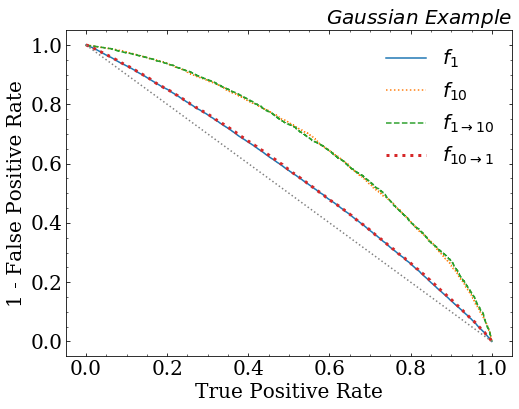

In [756]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_1D,1-fpr_1D,label="$f_{1}$")
plt.plot(tpr_nD,1-fpr_nD,label="$f_{10}$",ls=":")
plt.plot(tpr_nD_from1D,1-fpr_nD_from1D,label=r"$f_{1\rightarrow 10}$",ls="--")
plt.plot(tpr_Phi_Gaussian,1-fpr_Phi_Gaussian,label=r"$f_{10\rightarrow 1}$",ls=":",lw=3)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=20)
plt.ylabel("1 - False Positive Rate",fontsize=20)
plt.legend(frameon=False)
plt.title(r"$Gaussian$ $Example$",loc="right",fontsize=20)

plt.legend(frameon=False,fontsize=20)
plt.savefig("ensembleLearnPlots/Gaussian_ROC_both.pdf",bbox_inches='tight')

In [757]:
myx = np.linspace(-5,5,1000)
xx_vals = np.reshape(myx,[100,10,1])
myPhi_Gaussian = Model(input = pfn_Gaussian.model.input,output = pfn_Gaussian.model.layers[-2].output)
myPhi_preds_Gaussian = myPhi_Gaussian.predict(xx_vals,batch_size=int(0.1*len(xx_vals)))
preds_Phi_Gaussian = np.reshape(myPhi_preds_Gaussian,[n*len(myPhi_preds_Gaussian)])

preds_1D_Phi_Gaussian = model1D.predict(np.linspace(-5,5,1000))

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'likelihood ratio')

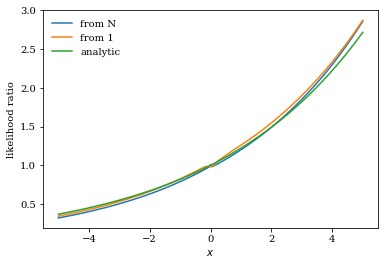

In [758]:
plt.plot(myx,np.exp(preds_Phi_Gaussian),label="from N")
plt.plot(myx,preds_1D_Phi_Gaussian/(1.-preds_1D_Phi_Gaussian),label="from 1")
plt.plot(myx,np.exp(-(myx-epsilon)**2/2+(myx+epsilon)**2/2),label="analytic")
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylabel("likelihood ratio")

In [856]:
#Let's do this many times !

yvals_1d = []
yvals_nd = []
for i in range(10):
    
    print("on i=",i)

    model1D_repeat = Sequential()
    model1D_repeat.add(Dense(128, activation='relu',input_shape =(1,))) 
    model1D_repeat.add(Dense(128, activation='relu'))
    model1D_repeat.add(Dense(1, activation='sigmoid'))
    model1D_repeat.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist_model1D_repeat = model1D_repeat.fit(X_1D_train, Y_1D_train, epochs=50, batch_size=int(0.1*len(X_1D_train)),validation_data=(X_1D_val, Y_1D_val))

    #Train 1 from N

    pfn_Gaussian_repeat = PFN(input_dim=X_nD_val_pfn.shape[-1], Phi_sizes=Phi_sizes_Gaussian, F_sizes=F_sizes_Gaussian, F_acts='linear', output_dim=1, output_act='linear', Phi_acts=['relu','relu','relu','linear'])

    pfn_Gaussian_repeat.model.layers.pop()
    pfn_Gaussian_repeat.model.layers.pop()
    for layer in pfn_Gaussian_repeat.model.layers:
        print(layer)
    pfn_Gaussian_repeat.model.compile(loss=lambda y_true, y_pred: myloss_many(y_true, y_pred), optimizer='adam', metrics=['accuracy'])

    historyf_Gaussian = pfn_Gaussian_repeat.fit(X_nD_train_pfn, Y_nD_train,
              epochs=50,
              batch_size=int(0.1*len(X_nD_train_pfn)),
              validation_data=(X_nD_val_pfn, Y_nD_val),
              verbose=1)

    ## Evaluate

    myx = np.linspace(-5,5,1000)
    xx_vals = np.reshape(myx,[100,10,1])
    myPhi_Gaussian_repeat = Model(input = pfn_Gaussian_repeat.model.input,output = pfn_Gaussian_repeat.model.layers[-2].output)
    myPhi_preds_Gaussian = myPhi_Gaussian_repeat.predict(xx_vals,batch_size=int(0.1*len(xx_vals)))
    preds_Phi_Gaussian = np.reshape(myPhi_preds_Gaussian,[n*len(myPhi_preds_Gaussian)])
    preds_1D_Phi_Gaussian = model1D_repeat.predict(np.linspace(-5,5,1000))
    
    yvals_1d+=[preds_1D_Phi_Gaussian]
    yvals_nd+=[preds_Phi_Gaussian]

on i= 0
Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/100000 [==============================] - 13s 131us/step - loss: 0.6895 - acc: 0.5388 - val_loss: 0.6888 - val_acc: 0.5390
Epoch 2/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6884 - acc: 0.5388 - val_loss: 0.6886 - val_acc: 0.5393
Epoch 3/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6883 - acc: 0.5386 - val_loss: 0.6884 - val_acc: 0.5388
Epoch 4/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5388 - val_loss: 0.6885 - val_acc: 0.5394
Epoch 5/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5387 - val_loss: 0.6884 - val_acc: 0.5388
Epoch 6/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6886 - val_acc: 0.5390
Epoch 7/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6883 - acc: 0.5392 - val_lo

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 13s 1ms/step - loss: 3.1084 - acc: 0.0343 - val_loss: 1.3510 - val_acc: 0.1220
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 1.3203 - acc: 0.0995 - val_loss: 1.3144 - val_acc: 0.1198
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.9114 - acc: 0.1946 - val_loss: 0.6762 - val_acc: 0.5854
Epoch 4/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.7276 - acc: 0.3004 - val_loss: 0.6989 - val_acc: 0.2032
Epoch 5/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6771 - acc: 0.3259 - val_loss: 0.6737 - val_acc: 0.5437
Epoch 6/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6668 - acc: 0.4273 - val_loss: 0.6472 - val_acc: 0.3540
Epoch 7/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6557 - acc: 0.4081 - val_loss: 0.6466 - val_acc

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


on i= 1
Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/100000 [==============================] - 13s 134us/step - loss: 0.6892 - acc: 0.5386 - val_loss: 0.6891 - val_acc: 0.5390
Epoch 2/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6884 - acc: 0.5386 - val_loss: 0.6884 - val_acc: 0.5393
Epoch 3/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6883 - acc: 0.5386 - val_loss: 0.6885 - val_acc: 0.5390
Epoch 4/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5386 - val_loss: 0.6884 - val_acc: 0.5389
Epoch 5/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5389 - val_loss: 0.6884 - val_acc: 0.5386
Epoch 6/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5394 - val_loss: 0.6886 - val_acc: 0.5387
Epoch 7/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_lo

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 14s 1ms/step - loss: 0.6847 - acc: 0.3727 - val_loss: 0.6500 - val_acc: 0.3362
Epoch 2/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6583 - acc: 0.4060 - val_loss: 0.6516 - val_acc: 0.3265
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6569 - acc: 0.4034 - val_loss: 0.6478 - val_acc: 0.3575
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6511 - acc: 0.4177 - val_loss: 0.6455 - val_acc: 0.3794
Epoch 5/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6500 - acc: 0.4188 - val_loss: 0.6450 - val_acc: 0.3879
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6492 - acc: 0.4254 - val_loss: 0.6446 - val_acc: 0.3951
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6492 - acc: 0.4238 - val_loss: 0.6432 - val_acc

100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6885 - val_acc: 0.5384
Epoch 10/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5385
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5399 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6886 - val_acc: 0.5383
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6883 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 14s 1ms/step - loss: 0.7703 - acc: 0.2938 - val_loss: 0.7195 - val_acc: 0.3299
Epoch 2/50
10000/10000 [==============================] - 0s 12us/step - loss: 0.6772 - acc: 0.3552 - val_loss: 0.6480 - val_acc: 0.5106
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6602 - acc: 0.4293 - val_loss: 0.6546 - val_acc: 0.3102
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6552 - acc: 0.3909 - val_loss: 0.6452 - val_acc: 0.4613
Epoch 5/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6525 - acc: 0.4454 - val_loss: 0.6434 - val_acc: 0.4182
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6503 - acc: 0.4194 - val_loss: 0.6463 - val_acc: 0.3717
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6508 - acc: 0.4128 - val_loss: 0.6448 - val_acc

100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 10/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6885 - val_acc: 0.5381
Epoch 15/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 14s 1ms/step - loss: 1.8342 - acc: 0.0809 - val_loss: 1.2699 - val_acc: 0.0771
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 1.0662 - acc: 0.1345 - val_loss: 0.9826 - val_acc: 0.0121
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.7487 - acc: 0.2747 - val_loss: 0.7337 - val_acc: 0.4618
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6908 - acc: 0.3614 - val_loss: 0.6842 - val_acc: 0.2068
Epoch 5/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6706 - acc: 0.3690 - val_loss: 0.6691 - val_acc: 0.5201
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6652 - acc: 0.3782 - val_loss: 0.6487 - val_acc: 0.3464
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6532 - acc: 0.4311 - val_loss: 0.6449 - val_acc

100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6885 - val_acc: 0.5385
Epoch 10/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 11/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 12/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6885 - val_acc: 0.5382
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6883 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 15s 1ms/step - loss: 3.0649 - acc: 0.0573 - val_loss: 1.2777 - val_acc: 0.0619
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 1.1000 - acc: 0.1321 - val_loss: 0.7197 - val_acc: 0.2231
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.7578 - acc: 0.3145 - val_loss: 0.6950 - val_acc: 0.1952
Epoch 4/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6933 - acc: 0.3635 - val_loss: 0.6734 - val_acc: 0.2599
Epoch 5/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6615 - acc: 0.3762 - val_loss: 0.6462 - val_acc: 0.3833
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6549 - acc: 0.4485 - val_loss: 0.6462 - val_acc: 0.4922
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6510 - acc: 0.4286 - val_loss: 0.6438 - val_acc

100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6885 - val_acc: 0.5384
Epoch 10/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6883 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6885 - val_acc: 0.5385
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5394 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5401 - val_loss: 0.6886 - val_acc: 0.5383
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5381
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 15s 1ms/step - loss: 0.8072 - acc: 0.3354 - val_loss: 0.7013 - val_acc: 0.1590
Epoch 2/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6747 - acc: 0.3495 - val_loss: 0.6530 - val_acc: 0.3437
Epoch 3/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6589 - acc: 0.3635 - val_loss: 0.6485 - val_acc: 0.4735
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6511 - acc: 0.4335 - val_loss: 0.6461 - val_acc: 0.4652
Epoch 5/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6495 - acc: 0.4460 - val_loss: 0.6436 - val_acc: 0.4442
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6490 - acc: 0.4146 - val_loss: 0.6434 - val_acc: 0.4351
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6493 - acc: 0.4307 - val_loss: 0.6442 - val_acc

100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 10/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5394 - val_loss: 0.6885 - val_acc: 0.5384
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5385
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6885 - val_acc: 0.5384
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5381
Epoch 14/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6885 - val_acc: 0.5382
Epoch 15/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 15s 2ms/step - loss: 0.6676 - acc: 0.3954 - val_loss: 0.6450 - val_acc: 0.3987
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6555 - acc: 0.4027 - val_loss: 0.6512 - val_acc: 0.5078
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6527 - acc: 0.4476 - val_loss: 0.6461 - val_acc: 0.4863
Epoch 4/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6494 - acc: 0.4246 - val_loss: 0.6436 - val_acc: 0.4361
Epoch 5/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6494 - acc: 0.4257 - val_loss: 0.6435 - val_acc: 0.4392
Epoch 6/50
10000/10000 [==============================] - 0s 15us/step - loss: 0.6493 - acc: 0.4329 - val_loss: 0.6467 - val_acc: 0.3656
Epoch 7/50
10000/10000 [==============================] - 0s 15us/step - loss: 0.6526 - acc: 0.4085 - val_loss: 0.6439 - val_acc

100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 10/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5381
Epoch 11/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 12/50
100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5399 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.6656 - acc: 0.3940 - val_loss: 0.6511 - val_acc: 0.5284
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6532 - acc: 0.4405 - val_loss: 0.6460 - val_acc: 0.3823
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6536 - acc: 0.4174 - val_loss: 0.6496 - val_acc: 0.5186
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6535 - acc: 0.4142 - val_loss: 0.6436 - val_acc: 0.4200
Epoch 5/50
10000/10000 [==============================] - 0s 15us/step - loss: 0.6519 - acc: 0.4342 - val_loss: 0.6555 - val_acc: 0.3071
Epoch 6/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6550 - acc: 0.3930 - val_loss: 0.6465 - val_acc: 0.4654
Epoch 7/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6511 - acc: 0.4273 - val_loss: 0.6514 - val_acc

100000/100000 [==============================] - 0s 1us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 10/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5395 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5383
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5382
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5385
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 16s 2ms/step - loss: 1.0718 - acc: 0.2439 - val_loss: 0.8602 - val_acc: 0.1612
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.7843 - acc: 0.2374 - val_loss: 0.6634 - val_acc: 0.5912
Epoch 3/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6784 - acc: 0.5095 - val_loss: 0.6496 - val_acc: 0.3390
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6620 - acc: 0.3456 - val_loss: 0.6438 - val_acc: 0.3947
Epoch 5/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6524 - acc: 0.4489 - val_loss: 0.6479 - val_acc: 0.3623
Epoch 6/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6534 - acc: 0.4011 - val_loss: 0.6438 - val_acc: 0.4252
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6499 - acc: 0.4389 - val_loss: 0.6445 - val_acc

100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6885 - val_acc: 0.5384
Epoch 10/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 11/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5383
Epoch 12/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5398 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 13/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5396 - val_loss: 0.6884 - val_acc: 0.5384
Epoch 14/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5382
Epoch 15/50
100000/100000 [==============================] - 0s 2us/step - loss: 0.6882 - acc: 0.5397 - val_loss: 0.6885 - val_acc: 0.5382
Epoch 16/50
100000/100000 [============

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 16s 2ms/step - loss: 0.7881 - acc: 0.2273 - val_loss: 0.7040 - val_acc: 0.1394
Epoch 2/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6689 - acc: 0.4189 - val_loss: 0.6664 - val_acc: 0.5233
Epoch 3/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6582 - acc: 0.4140 - val_loss: 0.6512 - val_acc: 0.3289
Epoch 4/50
10000/10000 [==============================] - 0s 13us/step - loss: 0.6508 - acc: 0.4216 - val_loss: 0.6467 - val_acc: 0.4737
Epoch 5/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6502 - acc: 0.4295 - val_loss: 0.6443 - val_acc: 0.3942
Epoch 6/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6492 - acc: 0.4272 - val_loss: 0.6437 - val_acc: 0.4447
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 0.6487 - acc: 0.4223 - val_loss: 0.6435 - val_acc

In [918]:
pfn_Gaussian_repeat.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 1)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    200         input[0][0]                      
__________________________________________________________________________________________________
activation_346 (Activation)     (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_346[0][0]             
__________________________________________________________________________________________________
activation

In [857]:
yvals_nd = np.array(yvals_nd)
yvals_1d = np.array(yvals_1d)

In [889]:
central_1d = np.array([np.mean(yvals_1d[:,i]/(1.-yvals_1d[:,i])) for i in range(len(myx))])
spread_1d = np.array([np.std(yvals_1d[:,i]/(1.-yvals_1d[:,i])) for i in range(len(myx))])
central_nd = np.array([np.mean(np.exp(yvals_nd[:,i])) for i in range(len(myx))])
spread_nd = np.array([np.std(np.exp(yvals_nd[:,i])) for i in range(len(myx))])

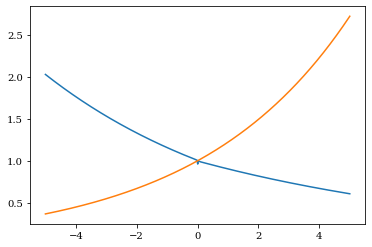

In [920]:
plt.plot(myx,np.exp(yvals_nd[0,:]))
#plt.plot(myx,yvals_1d[4,:]/(1.-yvals_1d[4,:]))
plt.plot(myx,np.exp(-(myx-epsilon)**2/2+(myx+epsilon)**2/2),label="analytic")

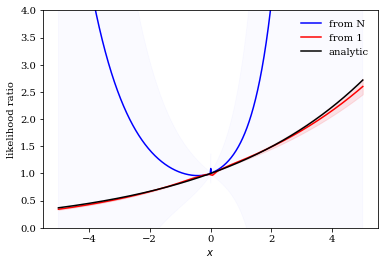

In [895]:
plt.plot(myx,central_nd,label="from N",color='blue')
plt.plot(myx,central_1d,label="from 1",color='red')
plt.plot(myx,np.exp(-(myx-epsilon)**2/2+(myx+epsilon)**2/2),label="analytic",color='black')
plt.legend(frameon=False)
plt.xlabel("$x$")
plt.ylim([0,4])
plt.ylabel("likelihood ratio")
plt.fill_between(myx,central_1d-spread_1d,central_1d+spread_1d,label="from 1",alpha=0.1,color="red")
plt.fill_between(myx,central_nd-spread_nd,central_nd+spread_nd,label="from N",alpha=0.02,color="blue")

In [14]:
#Papers that claim ensembling is useful:

#1810.00835
#1910.11530
#1912.10625
#2007.14586
#2011.04666

## BSM example

In [15]:
features_sig=pd.read_hdf("/data1/bpnachman/anomaly/events_anomalydetection_DelphesPythia8_v2_Wprime_features.h5")
features_bg=pd.read_hdf("/data1/bpnachman/anomaly/events_anomalydetection_DelphesPythia8_v2_qcd_features.h5")

In [16]:
def load_data(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2"]]
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    dataset["mjDelta"] = dataset["mjTwo"] - dataset["mjOne"]
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    dataset["mjTwo"] = dataset["mjTwo"]/1000.
    dataset["mjOne"] = dataset["mjOne"]/1000.
    dataset["mjDelta"] = dataset["mjDelta"]/1000.
    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21jOne","tau21jTwo"]]
    return dataset.to_numpy()

In [17]:
dataset_bg=load_data(features_bg)
dataset_bg=np.hstack((dataset_bg,np.zeros((len(dataset_bg),1))))

dataset_sig=load_data(features_sig)
dataset_sig=np.hstack((dataset_sig,np.ones((len(dataset_sig),1))))

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCop

In [18]:
SR_low = 3.3
SR_high = 3.7

n_phys = 3

X_sig_SR = dataset_sig[(dataset_sig[:,0] > SR_low)*(dataset_sig[:,0] < SR_high)][:,1:5]
X_bg_SR = dataset_bg[(dataset_bg[:,0] > SR_low)*(dataset_bg[:,0] < SR_high)][:,1:5]

X_sig_SR = X_sig_SR[0:len(X_sig_SR) - len(X_sig_SR) % n_phys]
X_bg_SR = X_bg_SR[0:len(X_bg_SR) - len(X_bg_SR) % n_phys]

X_1D_phys = np.concatenate([X_sig_SR,X_bg_SR])
Y_1D_phys = np.concatenate([np.ones(len(X_sig_SR)),np.zeros(len(X_bg_SR))])

X_nD_phys = np.reshape(X_1D_phys,[int(len(X_1D_phys)/n_phys),4*n_phys])
Y_nD_phys = np.concatenate([np.ones(int(len(X_sig_SR)/n_phys)),np.zeros(int(len(X_bg_SR)/n_phys))])

#Try standardizing?
scaler = preprocessing.StandardScaler().fit(X_nD_phys)
X_nD_phys = scaler.transform(X_nD_phys)

scaler1D = preprocessing.StandardScaler().fit(X_1D_phys)
X_1D_phys = scaler1D.transform(X_1D_phys)

X_1D_train_phys, X_1D_val_phys, Y_1D_train_phys, Y_1D_val_phys = train_test_split(X_1D_phys, Y_1D_phys, test_size=0.5)
X_nD_train_phys, X_nD_val_phys, Y_nD_train_phys, Y_nD_val_phys = train_test_split(X_nD_phys, Y_nD_phys, test_size=0.5)

#Try sorting the n-dimensional case based on mJ1?
X_nD_train_sort_phys = np.array([np.reshape(sorted(np.reshape(X_nD_train_phys[i],[n_phys,4]), key=lambda x: x[0]),[n_phys*4]) for i in range(len(X_nD_train_phys))])
X_nD_val_sort_phys = np.array([np.reshape(sorted(np.reshape(X_nD_val_phys[i],[n_phys,4]), key=lambda x: x[0]),[n_phys*4]) for i in range(len(X_nD_val_phys))])

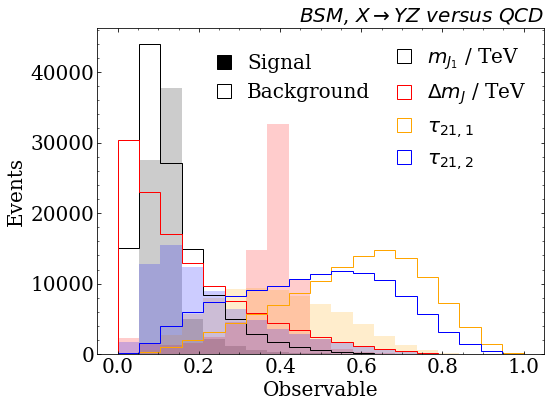

In [19]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(X_sig_SR[:,0],bins=np.linspace(0,1,20),alpha=0.2,color="black")
plt.hist(X_sig_SR[:,1],bins=np.linspace(0,1,20),alpha=0.2,color="red")
plt.hist(X_sig_SR[:,2],bins=np.linspace(0,1,20),alpha=0.2,color="orange")
plt.hist(X_sig_SR[:,3],bins=np.linspace(0,1,20),alpha=0.2,color="blue")

plt.hist(X_bg_SR[:,0],bins=np.linspace(0,1,20),color="black",histtype='step',label=r"$m_{J_1}$ / TeV")
plt.hist(X_bg_SR[:,1],bins=np.linspace(0,1,20),color="red",histtype='step',label=r"$\Delta m_J$ / TeV")
plt.hist(X_bg_SR[:,2],bins=np.linspace(0,1,20),color="orange",histtype='step',label=r"$\tau_{21,1}$")
plt.hist(X_bg_SR[:,3],bins=np.linspace(0,1,20),color="blue",histtype='step',label=r"$\tau_{21,2}$")

plt.xlabel("Observable",fontsize=20)
plt.ylabel("Events",fontsize=20)
leg = plt.legend(frameon=False,fontsize=20, handlelength=0.7)

x = patches.Patch(color='black', label='Signal',fill=True)
x2 = patches.Patch(color='black', label='Background',fill=False)

leg2 = plt.legend(handles=[x,x2],loc=(0.25, 0.75),fontsize=20,frameon=False, handlelength=0.7)
plt.gca().add_artist(leg)
plt.title(r"$BSM$, $X\rightarrow YZ$ $versus$ $QCD$",loc="right",fontsize=20)

plt.savefig("ensembleLearnPlots/BSM_Hist.pdf",bbox_inches='tight')

In [20]:
model_1D_phys = Sequential()
model_1D_phys.add(Dense(64, input_dim=4, activation='relu')) 
model_1D_phys.add(Dense(64, activation='relu'))
model_1D_phys.add(Dense(64, activation='relu'))
model_1D_phys.add(Dense(64, activation='relu'))
model_1D_phys.add(Dense(1, activation='sigmoid'))
model_1D_phys.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1D_phys.fit(X_1D_train_phys,Y_1D_train_phys, epochs=50, batch_size=int(0.1*len(X_1D_train_phys)),validation_data=(X_1D_val_phys,Y_1D_val_phys))

Train on 98323 samples, validate on 98324 samples
Epoch 1/50
98323/98323 [==============================] - 1s 5us/step - loss: 0.6619 - acc: 0.7017 - val_loss: 0.5880 - val_acc: 0.8551
Epoch 2/50
98323/98323 [==============================] - 0s 2us/step - loss: 0.5356 - acc: 0.8561 - val_loss: 0.4523 - val_acc: 0.8640
Epoch 3/50
98323/98323 [==============================] - 0s 1us/step - loss: 0.4118 - acc: 0.8640 - val_loss: 0.3560 - val_acc: 0.8710
Epoch 4/50
98323/98323 [==============================] - 0s 2us/step - loss: 0.3371 - acc: 0.8717 - val_loss: 0.3258 - val_acc: 0.8708
Epoch 5/50
98323/98323 [==============================] - 0s 2us/step - loss: 0.3220 - acc: 0.8743 - val_loss: 0.3167 - val_acc: 0.8750
Epoch 6/50
98323/98323 [==============================] - 0s 2us/step - loss: 0.3174 - acc: 0.8730 - val_loss: 0.3047 - val_acc: 0.8807
Epoch 7/50
98323/98323 [==============================] - 0s 2us/step - loss: 0.3094 - acc: 0.8815 - val_loss: 0.3030 - val_acc: 0.884

In [21]:
model_nD_phys = Sequential()
model_nD_phys.add(Dense(64, input_dim=4*n_phys, activation='relu')) 
model_nD_phys.add(Dense(64, activation='relu'))
model_nD_phys.add(Dense(128, activation='relu'))
model_nD_phys.add(Dense(64, activation='relu'))
model_nD_phys.add(Dense(1, activation='sigmoid'))
model_nD_phys.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nD_phys.fit(X_nD_train_phys,Y_nD_train_phys, epochs=500, batch_size=int(0.1*len(X_nD_train_phys)),validation_data=(X_nD_val_phys,Y_nD_val_phys))

Train on 32774 samples, validate on 32775 samples
Epoch 1/500
32774/32774 [==============================] - 0s 15us/step - loss: 0.5514 - acc: 0.8579 - val_loss: 0.3589 - val_acc: 0.9251
Epoch 2/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.2593 - acc: 0.9348 - val_loss: 0.1565 - val_acc: 0.9479
Epoch 3/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.1401 - acc: 0.9496 - val_loss: 0.1255 - val_acc: 0.9522
Epoch 4/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.1217 - acc: 0.9543 - val_loss: 0.1169 - val_acc: 0.9555
Epoch 5/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.1144 - acc: 0.9567 - val_loss: 0.1108 - val_acc: 0.9582
Epoch 6/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.1081 - acc: 0.9588 - val_loss: 0.1063 - val_acc: 0.9602
Epoch 7/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.1038 - acc: 0.9603 - val_loss: 0.1026 - val_ac

32774/32774 [==============================] - 0s 3us/step - loss: 0.0459 - acc: 0.9837 - val_loss: 0.0551 - val_acc: 0.9800
Epoch 61/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0452 - acc: 0.9842 - val_loss: 0.0549 - val_acc: 0.9802
Epoch 62/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0442 - acc: 0.9844 - val_loss: 0.0545 - val_acc: 0.9807
Epoch 63/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0437 - acc: 0.9847 - val_loss: 0.0573 - val_acc: 0.9787
Epoch 64/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0654 - acc: 0.9752 - val_loss: 0.0809 - val_acc: 0.9727
Epoch 65/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0595 - acc: 0.9780 - val_loss: 0.0669 - val_acc: 0.9767
Epoch 66/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0523 - acc: 0.9812 - val_loss: 0.0620 - val_acc: 0.9787
Epoch 67/500
32774/32774 [=====================

32774/32774 [==============================] - 0s 3us/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.0480 - val_acc: 0.9838
Epoch 179/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0477 - val_acc: 0.9837
Epoch 180/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0476 - val_acc: 0.9836
Epoch 181/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0477 - val_acc: 0.9836
Epoch 182/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0476 - val_acc: 0.9836
Epoch 183/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0250 - acc: 0.9921 - val_loss: 0.0478 - val_acc: 0.9837
Epoch 184/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0247 - acc: 0.9921 - val_loss: 0.0479 - val_acc: 0.9838
Epoch 185/500
32774/32774 [==============

32774/32774 [==============================] - 0s 3us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0490 - val_acc: 0.9837
Epoch 238/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0494 - val_acc: 0.9836
Epoch 239/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0257 - acc: 0.9911 - val_loss: 0.0516 - val_acc: 0.9835
Epoch 240/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0259 - acc: 0.9905 - val_loss: 0.0507 - val_acc: 0.9838
Epoch 241/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0235 - acc: 0.9921 - val_loss: 0.0495 - val_acc: 0.9842
Epoch 242/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0219 - acc: 0.9923 - val_loss: 0.0489 - val_acc: 0.9837
Epoch 243/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0502 - val_acc: 0.9842
Epoch 244/500
32774/32774 [==============

32774/32774 [==============================] - 0s 3us/step - loss: 0.0354 - acc: 0.9873 - val_loss: 0.0527 - val_acc: 0.9817
Epoch 297/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0327 - acc: 0.9883 - val_loss: 0.0515 - val_acc: 0.9817
Epoch 298/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.0313 - acc: 0.9892 - val_loss: 0.0506 - val_acc: 0.9819
Epoch 299/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0301 - acc: 0.9896 - val_loss: 0.0502 - val_acc: 0.9824
Epoch 300/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0293 - acc: 0.9900 - val_loss: 0.0500 - val_acc: 0.9822
Epoch 301/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0499 - val_acc: 0.9822
Epoch 302/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0277 - acc: 0.9908 - val_loss: 0.0506 - val_acc: 0.9830
Epoch 303/500
32774/32774 [==============

32774/32774 [==============================] - 0s 3us/step - loss: 0.0158 - acc: 0.9952 - val_loss: 0.0517 - val_acc: 0.9846
Epoch 356/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0517 - val_acc: 0.9846
Epoch 357/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0150 - acc: 0.9956 - val_loss: 0.0517 - val_acc: 0.9847
Epoch 358/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0148 - acc: 0.9957 - val_loss: 0.0519 - val_acc: 0.9848
Epoch 359/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0146 - acc: 0.9959 - val_loss: 0.0521 - val_acc: 0.9849
Epoch 360/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0144 - acc: 0.9959 - val_loss: 0.0521 - val_acc: 0.9848
Epoch 361/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0142 - acc: 0.9959 - val_loss: 0.0523 - val_acc: 0.9846
Epoch 362/500
32774/32774 [==============

32774/32774 [==============================] - 0s 3us/step - loss: 0.0091 - acc: 0.9978 - val_loss: 0.0595 - val_acc: 0.9850
Epoch 415/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.0090 - acc: 0.9978 - val_loss: 0.0590 - val_acc: 0.9843
Epoch 416/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0087 - acc: 0.9980 - val_loss: 0.0590 - val_acc: 0.9848
Epoch 417/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.0591 - val_acc: 0.9845
Epoch 418/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0083 - acc: 0.9980 - val_loss: 0.0593 - val_acc: 0.9846
Epoch 419/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0596 - val_acc: 0.9847
Epoch 420/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0081 - acc: 0.9982 - val_loss: 0.0618 - val_acc: 0.9850
Epoch 421/500
32774/32774 [==============

32774/32774 [==============================] - 0s 3us/step - loss: 0.0200 - acc: 0.9931 - val_loss: 0.0598 - val_acc: 0.9823
Epoch 474/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0583 - val_acc: 0.9828
Epoch 475/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0573 - val_acc: 0.9834
Epoch 476/500
32774/32774 [==============================] - 0s 4us/step - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0573 - val_acc: 0.9832
Epoch 477/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0130 - acc: 0.9960 - val_loss: 0.0597 - val_acc: 0.9834
Epoch 478/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0633 - val_acc: 0.9836
Epoch 479/500
32774/32774 [==============================] - 0s 3us/step - loss: 0.0188 - acc: 0.9940 - val_loss: 0.0613 - val_acc: 0.9834
Epoch 480/500
32774/32774 [==============

In [22]:
model_nD_sort_phys = Sequential()
model_nD_sort_phys.add(Dense(64, input_dim=4*n_phys, activation='relu')) 
model_nD_sort_phys.add(Dense(64, activation='relu'))
model_nD_sort_phys.add(Dense(128, activation='relu'))
model_nD_sort_phys.add(Dense(64, activation='relu'))
model_nD_sort_phys.add(Dense(1, activation='sigmoid'))
model_nD_sort_phys.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nD_sort_phys.fit(X_nD_train_sort_phys,Y_nD_train_phys, epochs=50, batch_size=int(0.1*len(X_nD_train_sort_phys)),validation_data=(X_nD_val_sort_phys,Y_nD_val_phys))

Train on 32774 samples, validate on 32775 samples
Epoch 1/50
32774/32774 [==============================] - 1s 18us/step - loss: 0.6195 - acc: 0.6646 - val_loss: 0.4613 - val_acc: 0.8647
Epoch 2/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.3638 - acc: 0.9003 - val_loss: 0.2165 - val_acc: 0.9499
Epoch 3/50
32774/32774 [==============================] - 0s 4us/step - loss: 0.1623 - acc: 0.9552 - val_loss: 0.1145 - val_acc: 0.9577
Epoch 4/50
32774/32774 [==============================] - 0s 4us/step - loss: 0.1082 - acc: 0.9590 - val_loss: 0.1026 - val_acc: 0.9617
Epoch 5/50
32774/32774 [==============================] - 0s 4us/step - loss: 0.1041 - acc: 0.9609 - val_loss: 0.0979 - val_acc: 0.9632
Epoch 6/50
32774/32774 [==============================] - 0s 4us/step - loss: 0.0975 - acc: 0.9634 - val_loss: 0.0922 - val_acc: 0.9651
Epoch 7/50
32774/32774 [==============================] - 0s 4us/step - loss: 0.0904 - acc: 0.9655 - val_loss: 0.0903 - val_acc: 0.96

In [23]:
scores_1D_phys = model_1D_phys.predict(X_1D_val_phys,batch_size=int(0.1*len(X_1D_train_phys)))
scores_nD_phys = model_nD_phys.predict(X_nD_val_phys,batch_size=int(0.1*len(X_nD_train_phys)))
scores_nD_sort_phys = model_nD_sort_phys.predict(X_nD_val_sort_phys,batch_size=int(0.1*len(X_nD_train_sort_phys)))

In [24]:
#scores_1D_fromnD_phys = model_1D_phys.predict(np.reshape(X_nD_val_phys,[n_phys*len(X_nD_val_phys),4]),batch_size=int(0.1*len(X_nD_train_phys)))
scores_1D_fromnD_phys = model_1D_phys.predict(scaler1D.transform(np.reshape(scaler.inverse_transform(X_nD_val_phys),[n_phys*len(X_nD_val_phys),4])),batch_size=int(0.1*len(X_nD_train_phys)))

In [25]:
scores_1D_fromnD_phys = np.reshape(scores_1D_fromnD_phys,[int(len(scores_1D_fromnD_phys)/n_phys),n_phys])

In [26]:
scaled_up_phys = np.array([np.prod(scores_1D_fromnD_phys[i,:] / (1.-scores_1D_fromnD_phys[i,:])) for i in range(len(scores_1D_fromnD_phys))])

In [27]:
fpr_1D_phys, tpr_1D_phys, _ = roc_curve(Y_1D_val_phys, scores_1D_phys)
fpr_nD_phys, tpr_nD_phys, _ = roc_curve(Y_nD_val_phys, scores_nD_phys)
fpr_nD_sort_phys, tpr_nD_sort_phys, _ = roc_curve(Y_nD_val_phys, scores_nD_sort_phys)
fpr_nD_from1D_phys, tpr_nD_from1D_phys, _ = roc_curve(Y_nD_val_phys, scaled_up_phys)

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


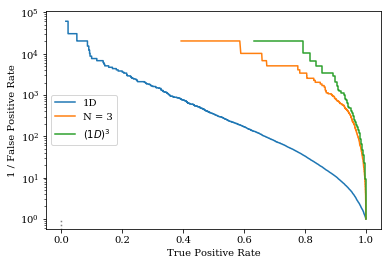

In [28]:
plt.plot(tpr_1D_phys,1./fpr_1D_phys,label="1D")
plt.plot(tpr_nD_phys,1./fpr_nD_phys,label="N = "+str(n_phys))
plt.plot(tpr_nD_from1D_phys,1./fpr_nD_from1D_phys,label="$(1D)^{"+str(n_phys)+"}$")
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate")
plt.ylabel("1 / False Positive Rate")
plt.yscale("log")
plt.legend()

In [29]:
#maybe try with a PFN?

In [30]:
import energyflow as ef
from energyflow.archs import PFN, EFN
from energyflow.utils import to_categorical

In [31]:
np.shape(X_nD_val_phys)

(32775, 12)

In [32]:
X_nD_val_phys_pfn = np.reshape(X_nD_val_phys,[len(X_nD_val_phys),n_phys,4])
X_nD_train_phys_pfn = np.reshape(X_nD_train_phys,[len(X_nD_train_phys),n_phys,4])

In [33]:
X_nD_val_phys_pfn[0]

array([[ 0.0232516 ,  0.57254116, -0.6975219 , -1.11152641],
       [ 0.14183378,  0.83389831, -0.90795728, -1.09508294],
       [-0.39255246,  1.12209154, -1.10957885, -1.11872501]])

In [114]:
Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)

In [115]:
pfn = PFN(input_dim=X_nD_val_phys_pfn.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes,F_dropouts=0.1,latent_dropout=0.1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_47 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_47[0][0]              
__________________________________________________________________________________________________
activation

In [116]:
num_epoch = 200
batch_size = int(0.1*len(X_nD_train_phys_pfn)) #was 5000
historyf = pfn.fit(X_nD_train_phys_pfn, to_categorical(Y_nD_train_phys,2),
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=(X_nD_val_phys_pfn, to_categorical(Y_nD_val_phys,2)),
        verbose=1)

Train on 32774 samples, validate on 32775 samples
Epoch 1/200
32774/32774 [==============================] - 1s 42us/step - loss: 0.6590 - acc: 0.7792 - val_loss: 0.1494 - val_acc: 0.9526
Epoch 2/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.1760 - acc: 0.9416 - val_loss: 0.1067 - val_acc: 0.9605
Epoch 3/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.1271 - acc: 0.9536 - val_loss: 0.0883 - val_acc: 0.9678
Epoch 4/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.1018 - acc: 0.9618 - val_loss: 0.0756 - val_acc: 0.9725
Epoch 5/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0917 - acc: 0.9679 - val_loss: 0.0664 - val_acc: 0.9752
Epoch 6/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0808 - acc: 0.9706 - val_loss: 0.0596 - val_acc: 0.9784
Epoch 7/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0729 - acc: 0.9742 - val_loss: 0.0561 - val_ac

32774/32774 [==============================] - 0s 5us/step - loss: 0.0471 - acc: 0.9842 - val_loss: 0.0409 - val_acc: 0.9853
Epoch 61/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0417 - acc: 0.9854 - val_loss: 0.0386 - val_acc: 0.9860
Epoch 62/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0389 - acc: 0.9860 - val_loss: 0.0387 - val_acc: 0.9861
Epoch 63/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0396 - acc: 0.9862 - val_loss: 0.0391 - val_acc: 0.9861
Epoch 64/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0388 - acc: 0.9857 - val_loss: 0.0374 - val_acc: 0.9867
Epoch 65/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0384 - acc: 0.9862 - val_loss: 0.0366 - val_acc: 0.9869
Epoch 66/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0381 - acc: 0.9863 - val_loss: 0.0364 - val_acc: 0.9870
Epoch 67/200
32774/32774 [=====================

32774/32774 [==============================] - 0s 5us/step - loss: 0.0304 - acc: 0.9891 - val_loss: 0.0335 - val_acc: 0.9888
Epoch 179/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0289 - acc: 0.9896 - val_loss: 0.0329 - val_acc: 0.9883
Epoch 180/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0284 - acc: 0.9898 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 181/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0276 - acc: 0.9899 - val_loss: 0.0327 - val_acc: 0.9885
Epoch 182/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0276 - acc: 0.9897 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 183/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0270 - acc: 0.9903 - val_loss: 0.0328 - val_acc: 0.9884
Epoch 184/200
32774/32774 [==============================] - 0s 5us/step - loss: 0.0271 - acc: 0.9902 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 185/200
32774/32774 [==============

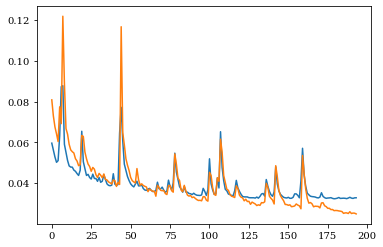

In [117]:
plt.plot(historyf.history['val_loss'][5:-1])
plt.plot(historyf.history['loss'][5:-1])

In [118]:
scores_nD_phys_pfn = pfn.predict(X_nD_val_phys_pfn,batch_size=int(0.1*len(X_nD_train_phys)))

In [119]:
fpr_nD_phys_pfn, tpr_nD_phys_pfn, _ = roc_curve(Y_nD_val_phys, scores_nD_phys_pfn[:,1])

In [144]:
#Save everything
np.save("ensemblelearning/Y_1D_val_phys",Y_1D_val_phys)
np.save("ensemblelearning/X_1D_val_phys",Y_1D_val_phys)
np.save("ensemblelearning/Y_1D_train_phys",Y_1D_train_phys)
np.save("ensemblelearning/X_1D_train_phys",X_1D_train_phys)

np.save("ensemblelearning/Y_nD_val_phys",Y_nD_val_phys)
np.save("ensemblelearning/X_nD_val_phys",Y_nD_val_phys)
np.save("ensemblelearning/Y_nD_train_phys",Y_nD_train_phys)
np.save("ensemblelearning/X_nD_train_phys",X_nD_train_phys)

model_json = model_1D_phys.to_json()
with open("ensemblelearning/model_1D_phys.json", "w") as json_file:
    json_file.write(model_json)
model_1D_phys.save_weights("ensemblelearning/model_1D_phys.h5")

model_json = model_nD_phys.to_json()
with open("ensemblelearning/model_nD_phys.json", "w") as json_file:
    json_file.write(model_json)
model_nD_phys.save_weights("ensemblelearning/model_nD_phys.h5")

model_json = model_nD_sort_phys.to_json()
with open("ensemblelearning/model_nD_sort_phys.json", "w") as json_file:
    json_file.write(model_json)
model_nD_sort_phys.save_weights("ensemblelearning/model_nD_sort_phys.h5")

model_json = pfn.model.to_json()
with open("ensemblelearning/model_pfn.json", "w") as json_file:
    json_file.write(model_json)
pfn.model.save_weights("ensemblelearning/model_pfn.h5")

#This needs to be run later
#model_json = pfn_v2.model.to_json()
#with open("ensemblelearning/model_pfn_v2.json", "w") as json_file:
#    json_file.write(model_json)
#pfn_v2.model.save_weights("ensemblelearning/model_pfn_v2.h5")

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


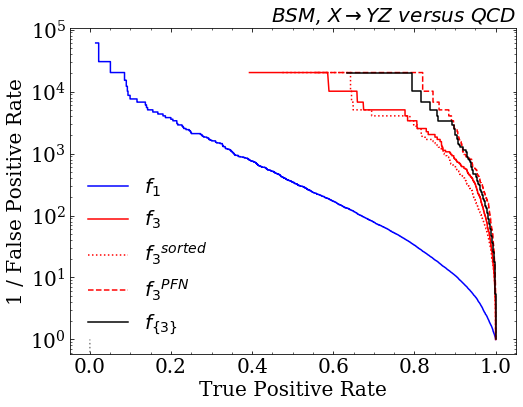

In [120]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_1D_phys,1./fpr_1D_phys,label="$f_{1}$",color="blue")
plt.plot(tpr_nD_phys,1./fpr_nD_phys,label="$f_{"+str(n_phys)+"}$",color="red")
plt.plot(tpr_nD_sort_phys,1./fpr_nD_sort_phys,label="$f_{"+str(n_phys)+"}$${}^{sorted}$",ls=":",color="red")
plt.plot(tpr_nD_phys_pfn,1./fpr_nD_phys_pfn,label="$f_{"+str(n_phys)+"}$${}^{PFN}$",ls="--",color="red")
plt.plot(tpr_nD_from1D_phys,1./fpr_nD_from1D_phys,label="$f_{\{"+str(n_phys)+"\}}$",color="black")
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=20)
plt.ylabel("1 / False Positive Rate",fontsize=20)
plt.yscale("log")
plt.legend(frameon=False,fontsize=20)
plt.title(r"$BSM$, $X\rightarrow YZ$ $versus$ $QCD$",loc="right",fontsize=20)

plt.savefig("ensembleLearnPlots/BSM_ROC.pdf",bbox_inches='tight')

In [41]:
#Now, use a custom PFN loss

In [42]:
Phi_sizes, F_sizes = (100, 100, 128, 1), []
pfn_v2 = PFN(input_dim=X_nD_val_phys_pfn.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes, F_acts='linear', output_dim=1, output_act='linear', Phi_acts=['relu','relu','relu','linear'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_8[0][0]               
__________________________________________________________________________________________________
activation

In [43]:
pfn_v2.model.layers.pop()
pfn_v2.model.layers.pop()
for layer in pfn_v2.model.layers:
    print(layer)

In [44]:
def myloss(y_true, y_pred):
    
    return binary_crossentropy(y_true,K.exp(y_pred)/(1.+K.exp(y_pred)))

In [45]:
pfn_v2.model.compile(loss=lambda y_true, y_pred: myloss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])

In [46]:
pfn_v2.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_8 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_8[0][0]               
__________________________________________________________________________________________________
activation

In [47]:
historyf_v2 = pfn_v2.fit(X_nD_train_phys_pfn, Y_nD_train_phys,
          epochs=50,
          batch_size=batch_size,
          validation_data=(X_nD_val_phys_pfn, Y_nD_val_phys),
          verbose=1)

Train on 32774 samples, validate on 32775 samples
Epoch 1/50
32774/32774 [==============================] - 1s 21us/step - loss: 0.2541 - acc: 0.1344 - val_loss: 0.1095 - val_acc: 0.0467
Epoch 2/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0998 - acc: 0.0346 - val_loss: 0.0879 - val_acc: 0.0256
Epoch 3/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0874 - acc: 0.0216 - val_loss: 0.0832 - val_acc: 0.0204
Epoch 4/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0817 - acc: 0.0196 - val_loss: 0.0770 - val_acc: 0.0195
Epoch 5/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0750 - acc: 0.0194 - val_loss: 0.0707 - val_acc: 0.0190
Epoch 6/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0688 - acc: 0.0202 - val_loss: 0.0657 - val_acc: 0.0198
Epoch 7/50
32774/32774 [==============================] - 0s 3us/step - loss: 0.0640 - acc: 0.0209 - val_loss: 0.0616 - val_acc: 0.01

In [48]:
scores_nD_phys_pfn_v2 = pfn_v2.predict(X_nD_val_phys_pfn,batch_size=int(0.1*len(X_nD_train_phys)))

In [49]:
fpr_nD_phys_pfn_v2, tpr_nD_phys_pfn_v2, _ = roc_curve(Y_nD_val_phys, scores_nD_phys_pfn_v2)

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


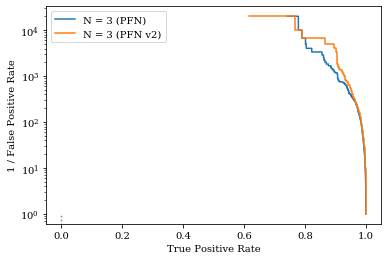

In [50]:
plt.plot(tpr_nD_phys_pfn,1./fpr_nD_phys_pfn,label="N = "+str(n_phys)+" (PFN)")
plt.plot(tpr_nD_phys_pfn_v2,1./fpr_nD_phys_pfn_v2,label="N = "+str(n_phys)+" (PFN v2)")
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate")
plt.ylabel("1 / False Positive Rate")
plt.yscale("log")
plt.legend()

In [51]:
for layer in pfn_v2.model.layers:
    print(layer.name,layer.output_shape)

input (None, None, 4)
tdist_0 (None, None, 100)
activation_8 (None, None, 100)
tdist_1 (None, None, 100)
activation_9 (None, None, 100)
tdist_2 (None, None, 128)
activation_10 (None, None, 128)
tdist_3 (None, None, 1)
mask (None, None)
activation_11 (None, None, 1)
sum (None, 1)


In [52]:
from keras.models import Model

In [53]:
myPhi = Model(input = pfn_v2.model.input,output = pfn_v2.model.layers[-2].output)

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  """Entry point for launching an IPython kernel.


In [54]:
myPhi_preds = myPhi.predict(X_nD_val_phys_pfn,batch_size=int(0.1*len(X_nD_train_phys)))

In [55]:
preds_Phi = np.reshape(myPhi_preds,[n_phys*len(myPhi_preds)])
Y_Phi = [[Y_nD_val_phys[i],Y_nD_val_phys[i],Y_nD_val_phys[i]] for i in range(len(Y_nD_val_phys))]
Y_Phi = np.reshape(Y_Phi,[n_phys*len(Y_Phi)])

In [56]:
fpr_Phi, tpr_Phi, _ = roc_curve(Y_Phi, preds_Phi)

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


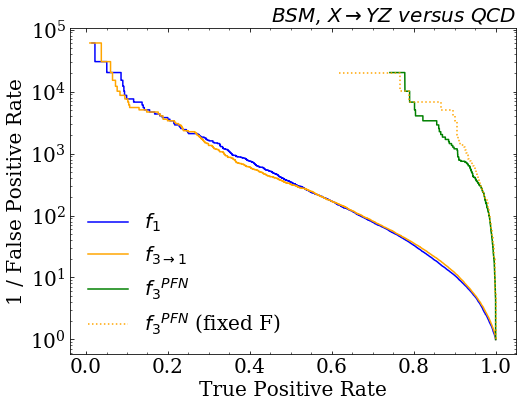

In [85]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_1D_phys,1./fpr_1D_phys,label="$f_{1}$",color="blue")
plt.plot(tpr_Phi,1./fpr_Phi,label=r"$f_{3\rightarrow 1}$",color="orange")

plt.plot(tpr_nD_phys_pfn,1./fpr_nD_phys_pfn,label="$f_{"+str(n_phys)+"}$${}^{PFN}$",color="green")
plt.plot(tpr_nD_phys_pfn_v2,1./fpr_nD_phys_pfn_v2,label="$f_{"+str(n_phys)+"}$${}^{PFN}$ (fixed F)",color="orange",ls=":")

plt.xlabel("True Positive Rate",fontsize=20)
plt.ylabel("1 / False Positive Rate",fontsize=20)
plt.yscale("log")
plt.legend(frameon=False,fontsize=20)

plt.title(r"$BSM$, $X\rightarrow YZ$ $versus$ $QCD$",loc="right",fontsize=20)
plt.savefig("ensembleLearnPlots/BSM_ROC2.pdf",bbox_inches='tight')

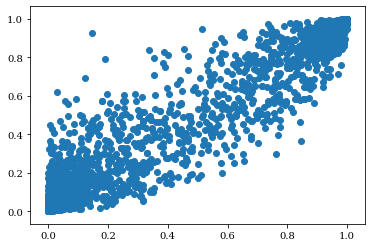

In [149]:
plt.scatter(scores_nD_phys_pfn[:,1],np.exp(scores_nD_phys_pfn_v2)/(1+np.exp(scores_nD_phys_pfn_v2)))

In [150]:
orig = scores_nD_phys_pfn[:,1]
new = np.exp(scores_nD_phys_pfn_v2)/(1+np.exp(scores_nD_phys_pfn_v2))

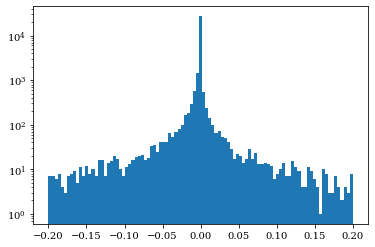

In [159]:
_,_,_=plt.hist(orig-new[:,0],bins=np.linspace(-0.2,0.2,100))
plt.yscale("log")

## Now let's do a harder classification task - top quark mass

In [58]:
test_dataset_0 = np.load('/data0/bpnachman/topmass/SRGN_Mt_default.npz')
test_dataset_1 = np.load('/data0/bpnachman/topmass/SRGN_Mt_unknown.npz')

In [59]:
def preprocess_data(X):
    return X / 1000.

In [60]:
X0_test_G = preprocess_data(test_dataset_0['generator'])
X0_test_S = preprocess_data(test_dataset_0['simulation'])
X1_test_G = preprocess_data(test_dataset_1['generator'])
X1_test_S = preprocess_data(test_dataset_1['simulation'])

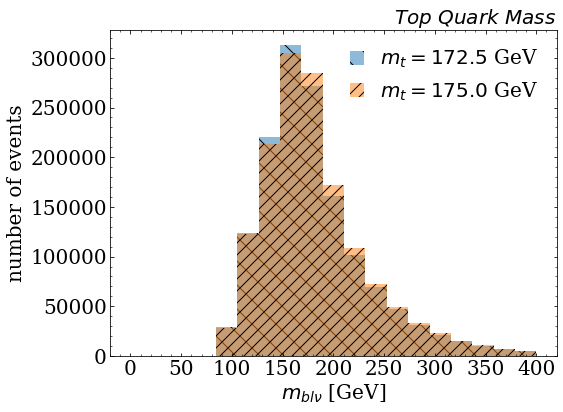

In [61]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

_,_,_=plt.hist(X0_test_S[:,0]*1000,bins=np.linspace(0,400,20),alpha=0.5,label="$m_t = 172.5$ GeV",hatch='\\')
_,_,_=plt.hist(X1_test_S[:,0]*1000,bins=np.linspace(0,400,20),alpha=0.5,label="$m_t = 175.0$ GeV",hatch='//')
plt.xlabel(r"$m_{bl\nu}$ [GeV]",fontsize=20)
plt.legend(frameon=False,fontsize=20,handlelength=0.7)
plt.ylabel("number of events",fontsize=20)

plt.title(r"$Top$ $Quark$ $Mass$",loc="right",fontsize=20)
plt.savefig("ensembleLearnPlots/Top_Features.pdf",bbox_inches='tight')

In [62]:
n_top = 20

X0_test_S = preprocess_data(test_dataset_0['generator'])
X1_test_S = preprocess_data(test_dataset_1['generator'])

X0_test_S = X0_test_S[0:len(X0_test_S) - len(X0_test_S) % n_top]
X1_test_S = X1_test_S[0:len(X1_test_S) - len(X1_test_S) % n_top]

X_1D_top = np.concatenate([X0_test_S,X1_test_S])
Y_1D_top = np.concatenate([np.ones(len(X0_test_S)),np.zeros(len(X1_test_S))])
    
X_nD_top = np.reshape(X_1D_top,[int(len(X_1D_top)/n_top),4*n_top])
Y_nD_top = np.concatenate([np.ones(int(len(X0_test_S)/n_top)),np.zeros(int(len(X1_test_S)/n_top))])

scaler_top = preprocessing.StandardScaler().fit(X_nD_top)
X_nD_top = scaler_top.transform(X_nD_top)

scaler_1D_top = preprocessing.StandardScaler().fit(X_1D_top)
X_1D_top = scaler_1D_top.transform(X_1D_top)

X_1D_top_train, X_1D_top_val, Y_1D_top_train, Y_1D_top_val = train_test_split(X_1D_top, Y_1D_top, test_size=0.5)
X_nD_top_train, X_nD_top_val, Y_nD_top_train, Y_nD_top_val = train_test_split(X_nD_top, Y_nD_top, test_size=0.5)

In [63]:
model1D_top = Sequential()
model1D_top.add(Dense(128, activation='relu',input_shape =(4,))) 
model1D_top.add(Dense(128, activation='relu'))
model1D_top.add(Dense(1, activation='sigmoid'))
model1D_top.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_top_model1D= model1D_top.fit(X_1D_top_train, Y_1D_top_train, epochs=20, batch_size=int(0.1*len(X_1D_top_train)),validation_data=(X_1D_top_val, Y_1D_top_val))

modelnD_top = Sequential()
modelnD_top.add(Dense(128, activation='relu',input_shape =(4*n_top,))) 
modelnD_top.add(Dense(128, activation='relu'))
modelnD_top.add(Dense(1, activation='sigmoid'))
modelnD_top.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_top_modelnD= modelnD_top.fit(X_nD_top_train, Y_nD_top_train, epochs=20, batch_size=int(0.1*len(X_nD_top_train)),validation_data=(X_nD_top_val, Y_nD_top_val))

scores_1D_top = model1D_top.predict(X_1D_top_val)
scores_nD_top = modelnD_top.predict(X_nD_top_val)

scores_1D_fromnD_top = model1D_top.predict(scaler_1D_top.transform(np.reshape(scaler_top.inverse_transform(X_nD_top_val),[n_top*len(X_nD_top_val),4])),batch_size=int(0.1*len(X_nD_top_train)))
#scores_1D_fromnD_top = model1D_top.predict(np.reshape(X_nD_top_val,[n*len(X_nD_top_val)]))
scores_1D_fromnD_top = np.reshape(scores_1D_fromnD_top,[int(len(scores_1D_fromnD_top)/n_top),n_top])

scaled_up_top = np.array([np.prod(scores_1D_fromnD_top[i,:] / (1.-scores_1D_fromnD_top[i,:])) for i in range(len(scores_1D_fromnD_top))])

fpr_1D_top, tpr_1D_top, _ = roc_curve(Y_1D_top_val, scores_1D_top)
fpr_nD_top, tpr_nD_top, _ = roc_curve(Y_nD_top_val, scores_nD_top)
fpr_nD_from1D_top, tpr_nD_from1D_top, _ = roc_curve(Y_nD_top_val, scaled_up_top)

Train on 1452070 samples, validate on 1452070 samples
Epoch 1/20
1452070/1452070 [==============================] - 2s 1us/step - loss: 0.6936 - acc: 0.5084 - val_loss: 0.6930 - val_acc: 0.5119
Epoch 2/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6927 - acc: 0.5147 - val_loss: 0.6928 - val_acc: 0.5144
Epoch 3/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6925 - acc: 0.5167 - val_loss: 0.6925 - val_acc: 0.5173
Epoch 4/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6923 - acc: 0.5185 - val_loss: 0.6924 - val_acc: 0.5169
Epoch 5/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6922 - acc: 0.5183 - val_loss: 0.6923 - val_acc: 0.5181
Epoch 6/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6922 - acc: 0.5193 - val_loss: 0.6922 - val_acc: 0.5185
Epoch 7/20
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6921 - acc: 0.5199 - v

/home/bpnachman/anaconda3/envs/shared_env2/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


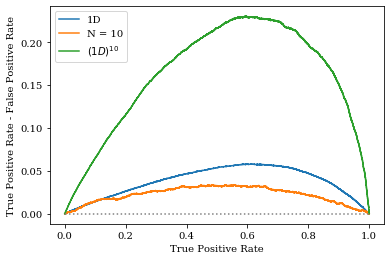

In [64]:
plt.plot(tpr_1D_top,1-fpr_1D_top-(1-tpr_1D_top),label="1D")
plt.plot(tpr_nD_top,1-fpr_nD_top-(1-tpr_nD_top),label="N = 10")
plt.plot(tpr_nD_from1D_top,1-fpr_nD_from1D_top-(1-tpr_nD_from1D_top),label="$(1D)^{10}$")
plt.plot([0,1],[0,0],ls=":",color="grey")
plt.xlabel("True Positive Rate")
plt.ylabel("True Positive Rate - False Positive Rate")
plt.legend()

In [65]:
X_nD_val_top_pfn = np.reshape(X_nD_top_val,[len(X_nD_top_val),n_top,4])
X_nD_train_top_pfn = np.reshape(X_nD_top_train,[len(X_nD_top_train),n_top,4])

Phi_sizes_top, F_sizes_top = (100, 100, 128), (100, 100, 100)
pfn_top = PFN(input_dim=X_nD_val_top_pfn.shape[-1], Phi_sizes=Phi_sizes_top, F_sizes=F_sizes_top)
num_epoch = 100
batch_size = 5000 #was 5000
historyf_top = pfn_top.fit(X_nD_train_top_pfn, to_categorical(Y_nD_top_train,2),
          epochs=num_epoch,
          batch_size=batch_size,
          validation_data=(X_nD_val_top_pfn, to_categorical(Y_nD_top_val,2)),
        verbose=1)
scores_nD_tops_pfn = pfn_top.predict(X_nD_val_top_pfn,batch_size=int(0.1*len(X_nD_top_train)))
fpr_nD_top_pfn, tpr_nD_top_pfn, _ = roc_curve(Y_nD_top_val, scores_nD_tops_pfn[:,1])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_13 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_13[0][0]              
__________________________________________________________________________________________________
activation

72603/72603 [==============================] - 0s 4us/step - loss: 0.6398 - acc: 0.6296 - val_loss: 0.6639 - val_acc: 0.5999
Epoch 91/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6381 - acc: 0.6315 - val_loss: 0.6552 - val_acc: 0.6106
Epoch 92/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6395 - acc: 0.6324 - val_loss: 0.6692 - val_acc: 0.5947
Epoch 93/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6386 - acc: 0.6333 - val_loss: 0.6558 - val_acc: 0.6102
Epoch 94/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6350 - acc: 0.6361 - val_loss: 0.6535 - val_acc: 0.6151
Epoch 95/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6440 - acc: 0.6268 - val_loss: 0.6576 - val_acc: 0.6087
Epoch 96/100
72603/72603 [==============================] - 0s 4us/step - loss: 0.6360 - acc: 0.6348 - val_loss: 0.6535 - val_acc: 0.6144
Epoch 97/100
72603/72603 [=====================

In [146]:
#Save everything
np.save("ensemblelearning/Y_1D_top_val",Y_1D_top_val)
np.save("ensemblelearning/Y_1D_top_val",Y_1D_top_val)
np.save("ensemblelearning/Y_1D_top_train",Y_1D_top_train)
np.save("ensemblelearning/X_1D_top_train",X_1D_top_train)

np.save("ensemblelearning/Y_nD_top_val",Y_nD_top_val)
np.save("ensemblelearning/Y_nD_top_val",Y_nD_top_val)
np.save("ensemblelearning/Y_nD_top_train",Y_nD_top_train)
np.save("ensemblelearning/X_nD_top_train",X_nD_top_train)

model_json = model1D_top.to_json()
with open("ensemblelearning/model1D_top.json", "w") as json_file:
    json_file.write(model_json)
model1D_top.save_weights("ensemblelearning/model1D_top.h5")

model_json = modelnD_top.to_json()
with open("ensemblelearning/modelnD_top.json", "w") as json_file:
    json_file.write(model_json)
modelnD_top.save_weights("ensemblelearning/modelnD_top.h5")

model_json = pfn_top.model.to_json()
with open("ensemblelearning/model_pfn_top.json", "w") as json_file:
    json_file.write(model_json)
pfn_top.model.save_weights("ensemblelearning/model_pfn_top.h5")

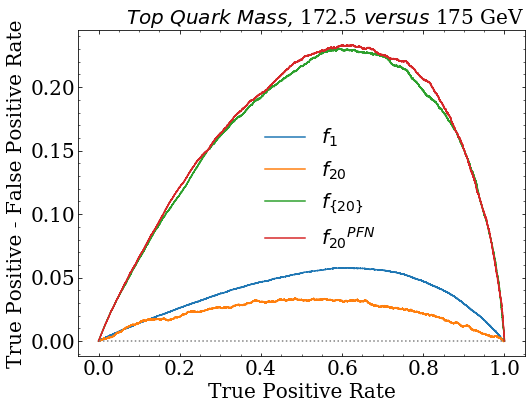

In [82]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_1D_top,1-fpr_1D_top-(1-tpr_1D_top),label="$f_{1}$")
plt.plot(tpr_nD_top,1-fpr_nD_top-(1-tpr_nD_top),label="$f_{"+str(n_top)+"}$")
plt.plot(tpr_nD_from1D_top,1-fpr_nD_from1D_top-(1-tpr_nD_from1D_top),label="$f_{\{"+str(n_top)+"\}}$")
plt.plot(tpr_nD_top_pfn,1-fpr_nD_top_pfn-(1-tpr_nD_top_pfn),label="$f_{"+str(n_top)+"}$${}^{PFN}$")
plt.plot([0,1],[0,0],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=20)
plt.ylabel("True Positive - False Positive Rate",fontsize=20)
plt.legend(frameon=False,fontsize=20,loc=(0.4,0.3))

plt.title(r"$Top$ $Quark$ $Mass$, 172.5 $versus$ 175 GeV",loc="right",fontsize=20)
plt.savefig("ensembleLearnPlots/Top_ROC.pdf",bbox_inches='tight')

In [68]:
Phi_sizes_top, F_sizes_top = (100, 100, 128), (100, 100, 100)
pfn_top_1e = PFN(input_dim=X_nD_val_top_pfn.shape[-1], Phi_sizes=Phi_sizes_top, F_sizes=F_sizes_top)
num_epoch = 100
batch_size = 5000 #was 5000

tprs_pfn = []
fprs_pfn = []
vallosses_pfn = []
trainlosses_pfn = []
for i in range(num_epoch):
    print("on epoch",i)
    historyf_top_1e = pfn_top_1e.fit(X_nD_train_top_pfn, to_categorical(Y_nD_top_train,2),epochs=1,batch_size=batch_size,validation_data=(X_nD_val_top_pfn, to_categorical(Y_nD_top_val,2)),verbose=1)
    scores_nD_tops_pfn_1e = pfn_top_1e.predict(X_nD_val_top_pfn,batch_size=int(0.1*len(X_nD_top_train)))
    fpr_nD_top_pfn_1e, tpr_nD_top_pfn_1e, _ = roc_curve(Y_nD_top_val, scores_nD_tops_pfn_1e[:,1])
    tprs_pfn+=[tpr_nD_top_pfn_1e]
    fprs_pfn+=[fpr_nD_top_pfn_1e]
    vallosses_pfn+=[historyf_top_1e.history['val_loss'][0]]
    trainlosses_pfn+=[historyf_top_1e.history['loss'][0]]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 4)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_20 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_20[0][0]              
__________________________________________________________________________________________________
activation

on epoch 63
Train on 72603 samples, validate on 72604 samples
Epoch 1/1
72603/72603 [==============================] - 0s 4us/step - loss: 0.6593 - acc: 0.6036 - val_loss: 0.6675 - val_acc: 0.5943
on epoch 64
Train on 72603 samples, validate on 72604 samples
Epoch 1/1
72603/72603 [==============================] - 0s 4us/step - loss: 0.6555 - acc: 0.6087 - val_loss: 0.6905 - val_acc: 0.5668
on epoch 65
Train on 72603 samples, validate on 72604 samples
Epoch 1/1
72603/72603 [==============================] - 0s 4us/step - loss: 0.6510 - acc: 0.6161 - val_loss: 0.6646 - val_acc: 0.5997
on epoch 66
Train on 72603 samples, validate on 72604 samples
Epoch 1/1
72603/72603 [==============================] - 0s 4us/step - loss: 0.6545 - acc: 0.6106 - val_loss: 0.6636 - val_acc: 0.5995
on epoch 67
Train on 72603 samples, validate on 72604 samples
Epoch 1/1
72603/72603 [==============================] - 0s 4us/step - loss: 0.6494 - acc: 0.6181 - val_loss: 0.6623 - val_acc: 0.6013
on epoch 68
Tra

In [69]:
tprs = []
fprs = []
vallosses = []
trainlosses = []

model1D_top_1e = Sequential()
model1D_top_1e.add(Dense(128, activation='relu',input_shape =(4,))) 
model1D_top_1e.add(Dense(128, activation='relu'))
model1D_top_1e.add(Dense(1, activation='sigmoid'))
model1D_top_1e.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

for i in range(num_epoch):
    print("on epoch",i)

    hist_top_model1D_1e= model1D_top_1e.fit(X_1D_top_train, Y_1D_top_train, epochs=1, batch_size=int(0.1*len(X_1D_top_train)),validation_data=(X_1D_top_val, Y_1D_top_val))
    scores_1D_top_1e = model1D_top_1e.predict(X_1D_top_val,batch_size=int(0.1*len(X_1D_top_train)))

    scores_1D_fromnD_top_1e = model1D_top_1e.predict(scaler_1D_top.transform(np.reshape(scaler_top.inverse_transform(X_nD_top_val),[n_top*len(X_nD_top_val),4])),batch_size=int(0.1*len(X_nD_top_train)))
    scores_1D_fromnD_top_1e = np.reshape(scores_1D_fromnD_top_1e,[int(len(scores_1D_fromnD_top_1e)/n_top),n_top])
    scaled_up_top_1e = np.array([np.prod(scores_1D_fromnD_top_1e[i,:] / (1.-scores_1D_fromnD_top_1e[i,:])) for i in range(len(scores_1D_fromnD_top_1e))])

    fpr_nD_from1D_top_1e, tpr_nD_from1D_top_1e, _ = roc_curve(Y_nD_top_val, scaled_up_top_1e)
    
    tprs+=[tpr_nD_from1D_top_1e]
    fprs+=[fpr_nD_from1D_top_1e]
    vallosses+=[hist_top_model1D_1e.history['val_loss'][0]]
    trainlosses+=[hist_top_model1D_1e.history['loss'][0]]

on epoch 0
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 2s 1us/step - loss: 0.6935 - acc: 0.5089 - val_loss: 0.6929 - val_acc: 0.5137
on epoch 1
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6927 - acc: 0.5142 - val_loss: 0.6926 - val_acc: 0.5144
on epoch 2
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6924 - acc: 0.5175 - val_loss: 0.6924 - val_acc: 0.5172
on epoch 3
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6923 - acc: 0.5180 - val_loss: 0.6923 - val_acc: 0.5176
on epoch 4
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6922 - acc: 0.5187 - val_loss: 0.692

1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6895 - acc: 0.5328 - val_loss: 0.6897 - val_acc: 0.5317
on epoch 41
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6895 - acc: 0.5328 - val_loss: 0.6897 - val_acc: 0.5313
on epoch 42
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6895 - acc: 0.5329 - val_loss: 0.6897 - val_acc: 0.5306
on epoch 43
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6895 - acc: 0.5323 - val_loss: 0.6897 - val_acc: 0.5317
on epoch 44
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6895 - acc: 0.5324 - val_loss: 0.6898 - val_acc: 0.5308
on epoch 45
Train on 1452070 samples, validate on 1

1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6890 - acc: 0.5344 - val_loss: 0.6893 - val_acc: 0.5333
on epoch 81
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6890 - acc: 0.5344 - val_loss: 0.6893 - val_acc: 0.5328
on epoch 82
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6890 - acc: 0.5346 - val_loss: 0.6893 - val_acc: 0.5328
on epoch 83
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6890 - acc: 0.5345 - val_loss: 0.6893 - val_acc: 0.5326
on epoch 84
Train on 1452070 samples, validate on 1452070 samples
Epoch 1/1
1452070/1452070 [==============================] - 1s 1us/step - loss: 0.6890 - acc: 0.5352 - val_loss: 0.6893 - val_acc: 0.5325
on epoch 85
Train on 1452070 samples, validate on 1

In [70]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx #array[idx]

In [71]:
fprat50s = [fprs[i][find_nearest(tprs[i],0.5)] for i in range(len(tprs))]
fprat50s_pfn = [fprs_pfn[i][find_nearest(tprs_pfn[i],0.5)] for i in range(len(fprs_pfn))]

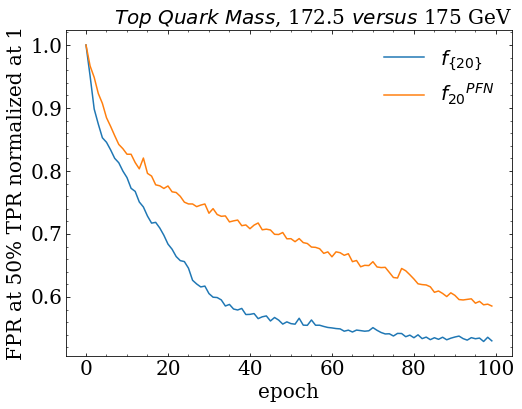

In [81]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

#plt.plot(fprat50s/fprat50s[0],label="$f_{\{20\}}$")
#plt.plot(fprat50s_pfn/fprat50s_pfn[0],label="$f_{20}$ (PFN)")

plt.plot(fprat50s/fprat50s[0],label="$f_{\{20\}}$")
plt.plot(fprat50s_pfn/fprat50s_pfn[0],label="$f_{20}$${}^{PFN}$")

plt.legend(frameon=False,fontsize=20)
plt.xlabel("epoch",fontsize=20)
plt.ylabel("FPR at 50% TPR normalized at 1",fontsize=20)

plt.title(r"$Top$ $Quark$ $Mass$, 172.5 $versus$ 175 GeV",loc="right",fontsize=20)
plt.savefig("ensembleLearnPlots/Top_LearningRate.pdf",bbox_inches='tight')

In [365]:
#Try doing maximum likelihood as a classification problem

In [387]:
N = 100000

In [498]:
theta0 = 0.2
thetas = np.random.uniform(theta0-0.01,theta0+0.01,N)

In [499]:
MC = np.random.normal(thetas,0.5)

In [500]:
data = np.random.normal(0.5,0.5,N)

In [501]:
X_MC = np.c_[MC,thetas]
X_data = np.c_[data,thetas]

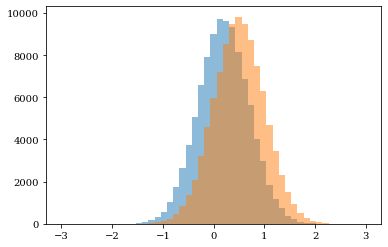

In [502]:
_,_,_=plt.hist(MC,bins=np.linspace(-3,3,50),alpha=0.5)
_,_,_=plt.hist(data,bins=np.linspace(-3,3,50),alpha=0.5)

In [503]:
X_MLE_train, X_MLE_val, Y_MLE_train, Y_MLE_val = train_test_split(np.concatenate([X_data,X_MC]), np.concatenate([np.ones(len(X_data)),np.zeros(len(X_MC))]), test_size=0.5)

In [504]:
def CustomLoss(y_true, y_pred):
    return -y_true*K.log(y_pred+0.000001) + (1.-y_true)*y_pred
    #return -y_true*K.log(y_pred+0.0001) - (1.-y_true)*K.log(1-y_pred+0.0001) #binary_crossentropy(y_true,y_pred)
    #return binary_crossentropy(y_true,y_pred)

In [507]:
model_MLE = Sequential()
model_MLE.add(Dense(64, activation='elu',input_shape =(2,))) 
model_MLE.add(Dense(128, activation='elu'))
model_MLE.add(Dense(64, activation='elu'))
model_MLE.add(Dense(1, activation='relu')) #was sigmoid
model_MLE.compile(loss=lambda y_true, y_pred: CustomLoss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])
hist_MLE = model_MLE.fit(X_MLE_train, Y_MLE_train, epochs=20, batch_size=int(0.1*len(X_MLE_train)),validation_data=(X_MLE_val, Y_MLE_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 7s 68us/step - loss: 0.6880 - acc: 0.5503 - val_loss: 0.4525 - val_acc: 0.4645
Epoch 2/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4476 - acc: 0.3123 - val_loss: 0.4608 - val_acc: 0.2191
Epoch 3/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4498 - acc: 0.2371 - val_loss: 0.4456 - val_acc: 0.2908
Epoch 4/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4352 - acc: 0.3393 - val_loss: 0.4428 - val_acc: 0.3857
Epoch 5/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4363 - acc: 0.4226 - val_loss: 0.4365 - val_acc: 0.4563
Epoch 6/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4295 - acc: 0.4585 - val_loss: 0.4342 - val_acc: 0.4235
Epoch 7/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4293 - acc: 0.4096 - val_loss: 0.4328

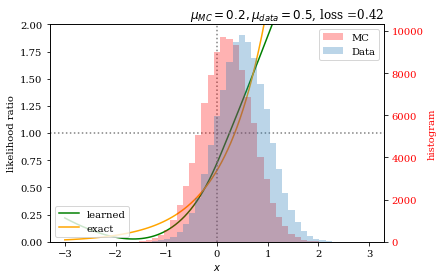

In [508]:
#xx = np.linspace(-3,3,100)
#preds_test = model_MLE.predict(np.c_[xx,0.5*np.ones(len(xx))])
#plt.plot(xx,preds_test/(1-preds_test))
#plt.plot(xx,np.exp(-((xx-0.5)**2-(xx+0.5)**2)/(2*0.5**2)))
#plt.ylim([0,2])
#plt.axvline(0,ls=":",color="grey")
#plt.axhline(1,ls=":",color="grey")

fig, ax1 = plt.subplots()
xx = np.linspace(-3,3,100)
preds_test = model_MLE.predict(np.c_[xx,theta0*np.ones(len(xx))])
plot1 = plt.plot(xx,preds_test,label="learned",ls="-",color='green')
plot2 = plt.plot(xx,np.exp(-((xx-0.5)**2-(xx-theta0)**2)/(2*0.5**2)),label="exact",color='orange')
plt.ylim([0,2])
plt.axvline(0,ls=":",color="grey")
plt.axhline(1,ls=":",color="grey")
plt.xlabel(r"$x$")
plt.ylabel("likelihood ratio")
plt.title(r"$\mu_{MC} = "+str(theta0)+r", \mu_{data}=0.5$, loss ="+"%0.2f" % hist_MLE.history['val_loss'][-1],loc="right")

ax2 = ax1.twinx()
_,_,_=plt.hist(MC,bins=np.linspace(-3,3,50),alpha=0.3,label="MC",color='red')
_,_,_=plt.hist(data,bins=np.linspace(-3,3,50),alpha=0.3,label="Data")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylabel("histogram",color='red')
leg = plt.legend([plot1[0],plot2[0]],['learned','exact'], loc="lower left",)
plt.legend()
plt.gca().add_artist(leg)

In [515]:
N = 100000

theta0 = 0.2

X_MC = np.random.normal(theta0,0.5,N)
X_data = np.random.normal(0.5,0.5,N)

X_MLE_train, X_MLE_val, Y_MLE_train, Y_MLE_val = train_test_split(np.concatenate([X_data,X_MC]), np.concatenate([np.ones(len(X_data)),np.zeros(len(X_MC))]), test_size=0.5)

def CustomLoss(y_true, y_pred):
    return -y_true*K.log(y_pred+0.00000001) + (1.-y_true)*y_pred

model_MLE = Sequential()
model_MLE.add(Dense(64, activation='elu',input_shape =(1,))) 
model_MLE.add(Dense(128, activation='elu'))
model_MLE.add(Dense(64, activation='elu'))
model_MLE.add(Dense(1, activation='relu')) #was sigmoid
model_MLE.compile(loss=lambda y_true, y_pred: CustomLoss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])
hist_MLE = model_MLE.fit(X_MLE_train, Y_MLE_train, epochs=10, batch_size=int(0.1*len(X_MLE_train)),validation_data=(X_MLE_val, Y_MLE_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 8s 82us/step - loss: 1.6977 - acc: 0.5693 - val_loss: 1.2469 - val_acc: 0.5413
Epoch 2/10
100000/100000 [==============================] - 0s 2us/step - loss: 1.1698 - acc: 0.4846 - val_loss: 1.0061 - val_acc: 0.4337
Epoch 3/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.8717 - acc: 0.4358 - val_loss: 0.6358 - val_acc: 0.4626
Epoch 4/10
100000/100000 [==============================] - 0s 1us/step - loss: 0.5122 - acc: 0.5040 - val_loss: 0.4425 - val_acc: 0.5320
Epoch 5/10
100000/100000 [==============================] - 0s 2us/step - loss: 0.4398 - acc: 0.5257 - val_loss: 0.4408 - val_acc: 0.5045
Epoch 6/10
100000/100000 [==============================] - 0s 2us/step - loss: 0.4334 - acc: 0.4722 - val_loss: 0.4349 - val_acc: 0.4171
Epoch 7/10
100000/100000 [==============================] - 0s 2us/step - loss: 0.4329 - acc: 0.3951 - val_loss: 0.4415

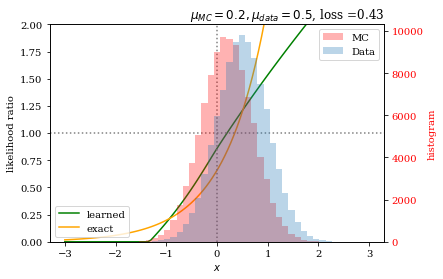

In [516]:
fig, ax1 = plt.subplots()
xx = np.linspace(-3,3,100)
preds_test = model_MLE.predict(xx)
plot1 = plt.plot(xx,preds_test,label="learned",ls="-",color='green')
plot2 = plt.plot(xx,np.exp(-((xx-0.5)**2-(xx-theta0)**2)/(2*0.5**2)),label="exact",color='orange')
plt.ylim([0,2])
plt.axvline(0,ls=":",color="grey")
plt.axhline(1,ls=":",color="grey")
plt.xlabel(r"$x$")
plt.ylabel("likelihood ratio")
plt.title(r"$\mu_{MC} = "+str(theta0)+r", \mu_{data}=0.5$, loss ="+"%0.2f" % hist_MLE.history['val_loss'][-1],loc="right")

ax2 = ax1.twinx()
_,_,_=plt.hist(MC,bins=np.linspace(-3,3,50),alpha=0.3,label="MC",color='red')
_,_,_=plt.hist(data,bins=np.linspace(-3,3,50),alpha=0.3,label="Data")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylabel("histogram",color='red')
leg = plt.legend([plot1[0],plot2[0]],['learned','exact'], loc="lower left",)
plt.legend()
plt.gca().add_artist(leg)

In [595]:
N = 100000

term1 = []
term2 = []
for theta0 in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]:

    X_MC = np.random.normal(theta0,0.5,N)
    X_data = np.random.normal(0.5,0.5,N)

    X_MLE_train, X_MLE_val, Y_MLE_train, Y_MLE_val = train_test_split(np.concatenate([X_data,X_MC]), np.concatenate([np.ones(len(X_data)),np.zeros(len(X_MC))]), test_size=0.5)

    def CustomLoss(y_true, y_pred):
        return -y_true*K.log(y_pred**2+0.00000001) + (1.-y_true)*y_pred**2

    K.clear_session()
    
    model_MLE = Sequential()
    model_MLE.add(Dense(64, activation='elu',input_shape =(1,))) 
    model_MLE.add(Dense(128, activation='elu'))
    model_MLE.add(Dense(64, activation='elu'))
    model_MLE.add(Dense(1, activation='linear')) #was sigmoid
    model_MLE.compile(loss=lambda y_true, y_pred: CustomLoss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])
    hist_MLE = model_MLE.fit(X_MLE_train, Y_MLE_train, epochs=20, batch_size=int(0.1*len(X_MLE_train)),validation_data=(X_MLE_val, Y_MLE_val))

    preds = model_MLE.predict(X_MLE_val)**2
    preds = -Y_MLE_val*np.log(preds[:,0]+0.00000001) + (1.-Y_MLE_val)*preds[:,0]
    print(theta0,np.mean(preds[Y_MLE_val==1]),np.mean(preds[Y_MLE_val==0]))
    term1+=[np.mean(preds[Y_MLE_val==1])]
    term2+=[np.mean(preds[Y_MLE_val==0])]

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 1s 5us/step - loss: 1.0489 - acc: 0.4680 - val_loss: 0.7685 - val_acc: 0.2978
Epoch 2/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.7907 - acc: 0.2797 - val_loss: 0.7110 - val_acc: 0.3148
Epoch 3/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.6579 - acc: 0.3891 - val_loss: 0.6314 - val_acc: 0.4673
Epoch 4/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.6050 - acc: 0.4865 - val_loss: 0.5696 - val_acc: 0.4685
Epoch 5/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.5374 - acc: 0.4467 - val_loss: 0.5191 - val_acc: 0.4165
Epoch 6/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4999 - acc: 0.4268 - val_loss: 0.4710 - val_acc: 0.4619
Epoch 7/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4599 - acc: 0.4736 - val_loss: 0.4585 

100000/100000 [==============================] - 0s 1us/step - loss: 0.4956 - acc: 6.9000e-04 - val_loss: 0.4888 - val_acc: 8.6000e-04
Epoch 19/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4954 - acc: 9.1000e-04 - val_loss: 0.4889 - val_acc: 9.8000e-04
Epoch 20/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 9.2000e-04 - val_loss: 0.4888 - val_acc: 9.7000e-04
0.4 -0.000248424700563259 0.9842188748883454
Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 1s 6us/step - loss: 1.3035 - acc: 0.4585 - val_loss: 1.0011 - val_acc: 0.3341
Epoch 2/20
100000/100000 [==============================] - 0s 1us/step - loss: 1.0244 - acc: 0.3177 - val_loss: 0.9382 - val_acc: 0.3475
Epoch 3/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.8664 - acc: 0.4171 - val_loss: 0.8245 - val_acc: 0.4803
Epoch 4/20
100000/100000 [==============================] - 

100000/100000 [==============================] - 0s 1us/step - loss: 0.4700 - acc: 0.5085 - val_loss: 0.4688 - val_acc: 0.5079
Epoch 15/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4685 - acc: 0.5070 - val_loss: 0.4678 - val_acc: 0.5086
Epoch 16/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4676 - acc: 0.5059 - val_loss: 0.4669 - val_acc: 0.5074
Epoch 17/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4669 - acc: 0.5058 - val_loss: 0.4661 - val_acc: 0.5060
Epoch 18/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4662 - acc: 0.5055 - val_loss: 0.4654 - val_acc: 0.5066
Epoch 19/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4656 - acc: 0.5041 - val_loss: 0.4649 - val_acc: 0.5071
Epoch 20/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.4652 - acc: 0.5049 - val_loss: 0.4642 - val_acc: 0.5052
0.7 -0.08068898214116356 1.010673223987

100000/100000 [==============================] - 0s 1us/step - loss: 0.2753 - acc: 0.4047 - val_loss: 0.2860 - val_acc: 0.4257
Epoch 12/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.2767 - acc: 0.3606 - val_loss: 0.2761 - val_acc: 0.3808
Epoch 13/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.3013 - acc: 0.3608 - val_loss: 0.3709 - val_acc: 0.2383
Epoch 14/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.2986 - acc: 0.4074 - val_loss: 0.2771 - val_acc: 0.4127
Epoch 15/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.2771 - acc: 0.3881 - val_loss: 0.2855 - val_acc: 0.4656
Epoch 16/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.2740 - acc: 0.4207 - val_loss: 0.2760 - val_acc: 0.3512
Epoch 17/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.2957 - acc: 0.4233 - val_loss: 0.3182 - val_acc: 0.4537
Epoch 18/20
100000/100000 [============

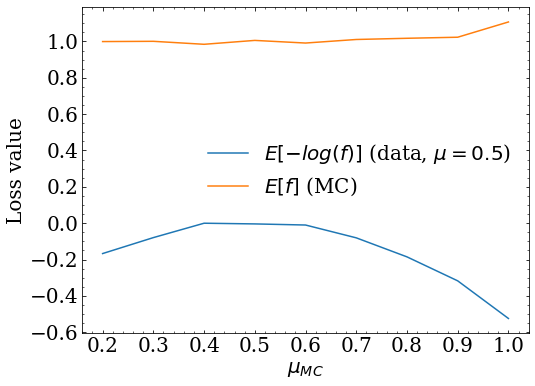

In [596]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.],term1,label="$E[-log(f)]$ (data, $\mu=0.5$)")
plt.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.],term2,label="$E[f]$ (MC)")
plt.xlabel("$\mu_{MC}$",fontsize=20)
plt.ylabel("Loss value",fontsize=20)
plt.legend(frameon=False,fontsize=20)

In [550]:
N = 100000

theta0 = 0.2

X_MC = np.random.normal(theta0,0.5,N)
X_data = np.random.normal(0.5,0.5,N)

X_MLE_train, X_MLE_val, Y_MLE_train, Y_MLE_val = train_test_split(np.concatenate([X_data,X_MC]), np.concatenate([np.ones(len(X_data)),np.zeros(len(X_MC))]), test_size=0.5)

def CustomLoss(y_true, y_pred):
    return -y_true*K.log(y_pred**2+0.00000001) + (1.-y_true)*y_pred**2
    #return -y_true*K.log(K.exp(y_pred)) + (1.-y_true)*K.exp(y_pred)

model_MLE = Sequential()
model_MLE.add(Dense(64, activation='relu',input_shape =(1,))) 
model_MLE.add(Dense(128, activation='relu'))
model_MLE.add(Dense(64, activation='relu'))
model_MLE.add(Dense(1, activation='linear')) #was sigmoid
model_MLE.compile(loss=lambda y_true, y_pred: CustomLoss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])
hist_MLE = model_MLE.fit(X_MLE_train, Y_MLE_train, epochs=20, batch_size=int(0.1*len(X_MLE_train)),validation_data=(X_MLE_val, Y_MLE_val))

Train on 100000 samples, validate on 100000 samples
Epoch 1/20
100000/100000 [==============================] - 10s 100us/step - loss: 1.9439 - acc: 0.4832 - val_loss: 1.1185 - val_acc: 0.4162
Epoch 2/20
100000/100000 [==============================] - 0s 1us/step - loss: 0.8440 - acc: 0.3225 - val_loss: 0.5953 - val_acc: 0.2169
Epoch 3/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.5360 - acc: 0.1462 - val_loss: 0.5254 - val_acc: 0.0854
Epoch 4/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.5181 - acc: 0.0693 - val_loss: 0.4956 - val_acc: 0.0649
Epoch 5/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4808 - acc: 0.0697 - val_loss: 0.4689 - val_acc: 0.0700
Epoch 6/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4600 - acc: 0.0459 - val_loss: 0.4501 - val_acc: 0.0000e+00
Epoch 7/20
100000/100000 [==============================] - 0s 2us/step - loss: 0.4418 - acc: 0.0000e+00 - val_lo

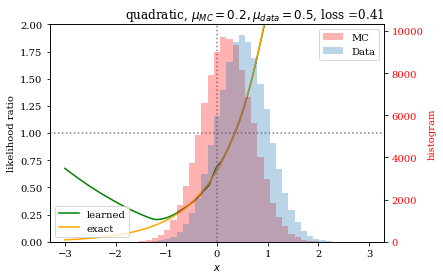

In [553]:
fig, ax1 = plt.subplots()
xx = np.linspace(-3,3,100)
preds_test = model_MLE.predict(xx)**2
plot1 = plt.plot(xx,preds_test,label="learned",ls="-",color='green')
plot2 = plt.plot(xx,np.exp(-((xx-0.5)**2-(xx-theta0)**2)/(2*0.5**2)),label="exact",color='orange')
plt.ylim([0,2])
plt.axvline(0,ls=":",color="grey")
plt.axhline(1,ls=":",color="grey")
plt.xlabel(r"$x$")
plt.ylabel("likelihood ratio")
plt.title(r"quadratic, $\mu_{MC} = "+str(theta0)+r", \mu_{data}=0.5$, loss ="+"%0.2f" % hist_MLE.history['val_loss'][-1],loc="right")

ax2 = ax1.twinx()
_,_,_=plt.hist(MC,bins=np.linspace(-3,3,50),alpha=0.3,label="MC",color='red')
_,_,_=plt.hist(data,bins=np.linspace(-3,3,50),alpha=0.3,label="Data")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylabel("histogram",color='red')
leg = plt.legend([plot1[0],plot2[0]],['learned','exact'], loc="lower left",)
plt.legend()
plt.gca().add_artist(leg)

In [572]:
K.clear_session()

In [624]:
def CustomLoss(y_true, y_pred):
    #y_pred[:,0] is the NN output, should approach the LLR.
    #y_pred[:,1] is the mean of the prior p(\theta)
    #y_pred[:,2] is the sigma of the prior p(\theta)

    #y_true[:,0] is 0 or 1
    #y_true[:,1] is theta
    #myweight = (sigma0/y_pred[:,2])*K.exp(-(y_true[:,1]-y_pred[:,1])**2/(2.*y_pred[:,2]**2)+(y_true[:,1]-theta0)**2/(2*sigma0**2))
    return (-y_true[:,0]*K.log(y_pred[:,0]**2+0.00000001) + (1.-y_true[:,0])*y_pred[:,0]**2) #*myweight
    #return -y_true*K.log(K.exp(y_pred)) + (1.-y_true)*K.exp(y_pred)
        
N = 200000

theta0 = 0.4
sigma0 = 0.2

X_data = np.random.normal(0.5,0.5,N)

sigmaval = []
meanval = []
lossval1 = []
lossval2 = []

for theta0 in np.linspace(0.2,1.,10):
    holdsig1 = []
    holdsig2 = []
    for sigma0 in np.linspace(0.01,0.2,10):

        thetas = np.random.normal(theta0,sigma0,N)

        X_MC = np.random.normal(thetas,0.5,N)

        Y_MC = np.zeros(len(X_MC)) #np.c_[np.zeros(len(X_MC)),thetas]
        Y_data = np.ones(len(X_data)) #np.c_[np.ones(len(X_data)),thetas]

        X_MLE_train, X_MLE_val, Y_MLE_train, Y_MLE_val = train_test_split(np.concatenate([X_data,X_MC]), np.concatenate([Y_data,Y_MC]), test_size=0.5)

        K.clear_session()

        model_MLE = Sequential()
        model_MLE.add(Dense(64, activation='elu',input_shape =(1,))) 
        model_MLE.add(Dense(128, activation='elu'))
        model_MLE.add(Dense(64, activation='elu'))
        model_MLE.add(Dense(1, activation='linear')) #was sigmoid
        model_MLE.compile(loss=lambda y_true, y_pred: CustomLoss(y_true, y_pred), optimizer='adam', metrics=['accuracy'])
        hist_MLE = model_MLE.fit(X_MLE_train, Y_MLE_train, epochs=50, batch_size=int(0.1*len(X_MLE_train)),validation_data=(X_MLE_val, Y_MLE_val))

        preds = model_MLE.predict(X_MLE_val)**2
        preds = -Y_MLE_val*np.log(preds[:,0]+0.00000001) + (1.-Y_MLE_val)*preds[:,0]

        holdsig1+=[np.mean(preds[Y_MLE_val==1])]
        holdsig2+=[np.mean(preds[Y_MLE_val==0])]
    lossval1+=[holdsig1]
    lossval2+=[holdsig2]

Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.6882 - acc: 0.3783 - val_loss: 0.7517 - val_acc: 0.2415
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6947 - acc: 0.2113 - val_loss: 0.6722 - val_acc: 0.1865
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6754 - acc: 0.1793 - val_loss: 0.6809 - val_acc: 0.1718
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6799 - acc: 0.1710 - val_loss: 0.6769 - val_acc: 0.1693
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6713 - acc: 0.1713 - val_loss: 0.6649 - val_acc: 0.1722
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6614 - acc: 0.1755 - val_loss: 0.6557 - val_acc: 0.1767
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6533 - acc: 0.1793 - val_loss: 0.6485 

200000/200000 [==============================] - 0s 1us/step - loss: 0.5133 - acc: 0.4444 - val_loss: 0.4961 - val_acc: 0.4478
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4817 - acc: 0.4572 - val_loss: 0.4626 - val_acc: 0.4660
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4561 - acc: 0.4706 - val_loss: 0.4409 - val_acc: 0.4800
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4316 - acc: 0.4967 - val_loss: 0.4221 - val_acc: 0.5078
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4210 - acc: 0.5102 - val_loss: 0.4212 - val_acc: 0.5083
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4211 - acc: 0.5039 - val_loss: 0.4213 - val_acc: 0.4972
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4202 - acc: 0.4964 - val_loss: 0.4199 - val_acc: 0.4960
Epoch 16/50
200000/200000 [============

Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4196 - acc: 0.4928 - val_loss: 0.4187 - val_acc: 0.4934
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4192 - acc: 0.4930 - val_loss: 0.4184 - val_acc: 0.4932
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4189 - acc: 0.4910 - val_loss: 0.4181 - val_acc: 0.4909
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4187 - acc: 0.4917 - val_loss: 0.4178 - val_acc: 0.4896
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4184 - acc: 0.4863 - val_loss: 0.4176 - val_acc: 0.4862
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4181 - acc: 0.4867 - val_loss: 0.4172 - val_acc: 0.4878
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4179 - acc: 0.4860 - val_loss: 0.4170 - val_acc: 0.4862
Epoch 25/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4178 - acc: 0.0295 - val_loss: 0.4160 - val_acc: 0.0294
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4196 - acc: 0.0200 - val_loss: 0.4222 - val_acc: 0.0060
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4209 - acc: 0.0103 - val_loss: 0.4167 - val_acc: 0.0194
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4176 - acc: 0.0255 - val_loss: 0.4151 - val_acc: 0.0312
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4170 - acc: 0.0324 - val_loss: 0.4150 - val_acc: 0.0328
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4165 - acc: 0.0307 - val_loss: 0.4146 - val_acc: 0.0283
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4164 - acc: 0.0251 - val_loss: 0.4145 - val_acc: 0.0240
Epoch 33/50
200000/200000 [============

Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4157 - acc: 0.4682 - val_loss: 0.4160 - val_acc: 0.4702
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4155 - acc: 0.4733 - val_loss: 0.4158 - val_acc: 0.4696
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4154 - acc: 0.4675 - val_loss: 0.4157 - val_acc: 0.4693
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4153 - acc: 0.4704 - val_loss: 0.4156 - val_acc: 0.4671
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4152 - acc: 0.4673 - val_loss: 0.4156 - val_acc: 0.4671
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4151 - acc: 0.4670 - val_loss: 0.4155 - val_acc: 0.4648
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4150 - acc: 0.4651 - val_loss: 0.4154 - val_acc: 0.4647
Epoch 42/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4159 - acc: 0.4720 - val_loss: 0.4146 - val_acc: 0.4724
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4158 - acc: 0.4708 - val_loss: 0.4145 - val_acc: 0.4672
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4157 - acc: 0.4702 - val_loss: 0.4144 - val_acc: 0.4702
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4157 - acc: 0.4683 - val_loss: 0.4144 - val_acc: 0.4667
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4156 - acc: 0.4668 - val_loss: 0.4143 - val_acc: 0.4689
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4155 - acc: 0.4687 - val_loss: 0.4142 - val_acc: 0.4657
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4154 - acc: 0.4659 - val_loss: 0.4142 - val_acc: 0.4654
Epoch 50/50
200000/200000 [============

200000/200000 [==============================] - 0s 2us/step - loss: 1.2534 - acc: 0.3327 - val_loss: 0.6720 - val_acc: 0.1799
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7131 - acc: 0.1532 - val_loss: 0.7520 - val_acc: 0.1382
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6918 - acc: 0.1395 - val_loss: 0.6164 - val_acc: 0.1446
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5837 - acc: 0.1518 - val_loss: 0.5595 - val_acc: 0.1583
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5474 - acc: 0.1552 - val_loss: 0.5231 - val_acc: 0.1453
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4869 - acc: 0.1217 - val_loss: 0.4475 - val_acc: 0.0881
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4296 - acc: 0.0613 - val_loss: 0.4218 - val_acc: 0.0301
Epoch 8/50
200000/200000 [===================

Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4230 - acc: 0.0296 - val_loss: 0.4224 - val_acc: 0.0377
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4280 - acc: 0.0537 - val_loss: 0.4419 - val_acc: 0.0706
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4327 - acc: 0.0627 - val_loss: 0.4289 - val_acc: 0.0359
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4264 - acc: 0.0258 - val_loss: 0.4231 - val_acc: 0.0259
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4240 - acc: 0.0288 - val_loss: 0.4214 - val_acc: 0.0292
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4211 - acc: 0.0347 - val_loss: 0.4215 - val_acc: 0.0399
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4212 - acc: 0.0414 - val_loss: 0.4220 - val_acc: 0.0433
Epoch 17/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4235 - acc: 0.0329 - val_loss: 0.4207 - val_acc: 0.0301
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4235 - acc: 0.0297 - val_loss: 0.4205 - val_acc: 0.0291
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4233 - acc: 0.0308 - val_loss: 0.4201 - val_acc: 0.0321
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4232 - acc: 0.0329 - val_loss: 0.4201 - val_acc: 0.0323
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4230 - acc: 0.0337 - val_loss: 0.4199 - val_acc: 0.0344
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4229 - acc: 0.0353 - val_loss: 0.4199 - val_acc: 0.0347
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4228 - acc: 0.0340 - val_loss: 0.4198 - val_acc: 0.0321
Epoch 25/50
200000/200000 [============

Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4618 - acc: 0.5076 - val_loss: 0.4615 - val_acc: 0.5076
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4616 - acc: 0.5076 - val_loss: 0.4613 - val_acc: 0.5076
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4615 - acc: 0.5076 - val_loss: 0.4611 - val_acc: 0.5075
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4613 - acc: 0.5075 - val_loss: 0.4610 - val_acc: 0.5075
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4612 - acc: 0.5074 - val_loss: 0.4608 - val_acc: 0.5074
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4611 - acc: 0.5074 - val_loss: 0.4607 - val_acc: 0.5075
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4610 - acc: 0.5074 - val_loss: 0.4606 - val_acc: 0.5072
Epoch 34/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4741 - acc: 0.0267 - val_loss: 0.4720 - val_acc: 0.0274
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4743 - acc: 0.0288 - val_loss: 0.4720 - val_acc: 0.0286
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4733 - acc: 0.0264 - val_loss: 0.4708 - val_acc: 0.0230
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4717 - acc: 0.0222 - val_loss: 0.4691 - val_acc: 0.0214
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4706 - acc: 0.0214 - val_loss: 0.4683 - val_acc: 0.0210
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4698 - acc: 0.0211 - val_loss: 0.4675 - val_acc: 0.0207
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4691 - acc: 0.0211 - val_loss: 0.4669 - val_acc: 0.0212
Epoch 42/50
200000/200000 [============

Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4572 - acc: 0.4874 - val_loss: 0.4563 - val_acc: 0.4881
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4854 - val_loss: 0.4563 - val_acc: 0.4860
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4859 - val_loss: 0.4563 - val_acc: 0.4872
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4856 - val_loss: 0.4562 - val_acc: 0.4863
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4847 - val_loss: 0.4562 - val_acc: 0.4860
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4848 - val_loss: 0.4562 - val_acc: 0.4855
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4571 - acc: 0.4845 - val_loss: 0.4562 - val_acc: 0.4858
Train on 200000 samples, va

200000/200000 [==============================] - 0s 1us/step - loss: 0.8406 - acc: 0.1416 - val_loss: 0.8331 - val_acc: 0.1378
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7595 - acc: 0.1471 - val_loss: 0.7142 - val_acc: 0.1633
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7073 - acc: 0.1724 - val_loss: 0.7054 - val_acc: 0.1763
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6788 - acc: 0.1653 - val_loss: 0.6420 - val_acc: 0.1455
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6076 - acc: 0.1289 - val_loss: 0.5771 - val_acc: 0.1092
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5438 - acc: 0.0936 - val_loss: 0.4967 - val_acc: 0.0658
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4743 - acc: 0.0327 - val_loss: 0.4665 - val_acc: 0.0045
Epoch 9/50
200000/200000 [===================

Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4616 - acc: 0.5110 - val_loss: 0.4607 - val_acc: 0.5087
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4609 - acc: 0.5086 - val_loss: 0.4606 - val_acc: 0.5071
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4608 - acc: 0.5072 - val_loss: 0.4604 - val_acc: 0.5065
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.5073 - val_loss: 0.4602 - val_acc: 0.5068
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4605 - acc: 0.5073 - val_loss: 0.4601 - val_acc: 0.5065
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4604 - acc: 0.5069 - val_loss: 0.4599 - val_acc: 0.5061
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4602 - acc: 0.5065 - val_loss: 0.4598 - val_acc: 0.5055
Epoch 18/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4651 - acc: 0.0104 - val_loss: 0.4619 - val_acc: 0.0123
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4612 - acc: 0.0141 - val_loss: 0.4622 - val_acc: 0.0159
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0167 - val_loss: 0.4616 - val_acc: 0.0168
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4603 - acc: 0.0156 - val_loss: 0.4610 - val_acc: 0.0135
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4599 - acc: 0.0136 - val_loss: 0.4608 - val_acc: 0.0131
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4598 - acc: 0.0131 - val_loss: 0.4607 - val_acc: 0.0110
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4597 - acc: 0.0106 - val_loss: 0.4604 - val_acc: 0.0100
Epoch 26/50
200000/200000 [============

Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4600 - acc: 0.0093 - val_loss: 0.4581 - val_acc: 0.0093
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4600 - acc: 0.0094 - val_loss: 0.4581 - val_acc: 0.0091
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4600 - acc: 0.0093 - val_loss: 0.4581 - val_acc: 0.0089
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4600 - acc: 0.0087 - val_loss: 0.4581 - val_acc: 0.0088
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4600 - acc: 0.0088 - val_loss: 0.4580 - val_acc: 0.0085
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4599 - acc: 0.0084 - val_loss: 0.4580 - val_acc: 0.0083
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4599 - acc: 0.0083 - val_loss: 0.4580 - val_acc: 0.0084
Epoch 35/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4608 - acc: 0.0088 - val_loss: 0.4591 - val_acc: 0.0093
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0085 - val_loss: 0.4591 - val_acc: 0.0083
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0082 - val_loss: 0.4591 - val_acc: 0.0084
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0081 - val_loss: 0.4591 - val_acc: 0.0080
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0081 - val_loss: 0.4591 - val_acc: 0.0089
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0078 - val_loss: 0.4591 - val_acc: 0.0079
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4607 - acc: 0.0082 - val_loss: 0.4591 - val_acc: 0.0077
Epoch 43/50
200000/200000 [============

Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4582 - acc: 0.5060 - val_loss: 0.4589 - val_acc: 0.5064
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4581 - acc: 0.5060 - val_loss: 0.4589 - val_acc: 0.5060
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4581 - acc: 0.5061 - val_loss: 0.4589 - val_acc: 0.5063
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4582 - acc: 0.5056 - val_loss: 0.4589 - val_acc: 0.5061
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4582 - acc: 0.5058 - val_loss: 0.4589 - val_acc: 0.5063
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4582 - acc: 0.5058 - val_loss: 0.4589 - val_acc: 0.5055
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.0699 - acc: 0.2407 - val_loss: 0

200000/200000 [==============================] - 0s 2us/step - loss: 1.0848 - acc: 0.4451 - val_loss: 0.9622 - val_acc: 0.2981
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9181 - acc: 0.3223 - val_loss: 0.8339 - val_acc: 0.4012
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8412 - acc: 0.4571 - val_loss: 0.8373 - val_acc: 0.4750
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8110 - acc: 0.4446 - val_loss: 0.7951 - val_acc: 0.4047
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7872 - acc: 0.4085 - val_loss: 0.7682 - val_acc: 0.4360
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7539 - acc: 0.4632 - val_loss: 0.7362 - val_acc: 0.4702
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7125 - acc: 0.4762 - val_loss: 0.6763 - val_acc: 0.5072
Epoch 8/50
200000/200000 [===================

Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8432 - acc: 0.4139 - val_loss: 0.8356 - val_acc: 0.4104
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8283 - acc: 0.4106 - val_loss: 0.8161 - val_acc: 0.4131
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8122 - acc: 0.4182 - val_loss: 0.7985 - val_acc: 0.4260
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7939 - acc: 0.4296 - val_loss: 0.7783 - val_acc: 0.4343
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7756 - acc: 0.4331 - val_loss: 0.7611 - val_acc: 0.4426
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7506 - acc: 0.4615 - val_loss: 0.7298 - val_acc: 0.4777
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7209 - acc: 0.4866 - val_loss: 0.7078 - val_acc: 0.4955
Epoch 17/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4897 - acc: 0.4998 - val_loss: 0.4863 - val_acc: 0.5025
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4896 - acc: 0.4997 - val_loss: 0.4861 - val_acc: 0.5025
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4895 - acc: 0.4997 - val_loss: 0.4861 - val_acc: 0.5024
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4894 - acc: 0.4997 - val_loss: 0.4859 - val_acc: 0.5024
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4893 - acc: 0.4996 - val_loss: 0.4859 - val_acc: 0.5023
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4892 - acc: 0.4995 - val_loss: 0.4858 - val_acc: 0.5023
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4891 - acc: 0.4995 - val_loss: 0.4857 - val_acc: 0.5022
Epoch 25/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 0.0011 - val_loss: 0.4869 - val_acc: 9.7000e-04
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 0.0010 - val_loss: 0.4869 - val_acc: 9.0500e-04
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 9.9000e-04 - val_loss: 0.4869 - val_acc: 9.5500e-04
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 0.0010 - val_loss: 0.4869 - val_acc: 9.2000e-04
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 9.8000e-04 - val_loss: 0.4869 - val_acc: 9.0500e-04
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 9.5000e-04 - val_loss: 0.4868 - val_acc: 8.7000e-04
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4857 - acc: 9.5000e-04 - val_loss: 0.4868 - val_acc: 8.6000

Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4854 - acc: 5.4000e-04 - val_loss: 0.4872 - val_acc: 5.7500e-04
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4854 - acc: 4.6500e-04 - val_loss: 0.4871 - val_acc: 5.4500e-04
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4854 - acc: 4.2500e-04 - val_loss: 0.4871 - val_acc: 4.1500e-04
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4853 - acc: 2.3500e-04 - val_loss: 0.4871 - val_acc: 4.2500e-04
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4853 - acc: 3.2500e-04 - val_loss: 0.4870 - val_acc: 3.6500e-04
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4853 - acc: 2.2500e-04 - val_loss: 0.4871 - val_acc: 4.0000e-04
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4853 - acc: 2.6000e-04 - val_loss: 

Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.8000e-04 - val_loss: 0.4848 - val_acc: 5.4500e-04
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.4500e-04 - val_loss: 0.4848 - val_acc: 5.0500e-04
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.4500e-04 - val_loss: 0.4848 - val_acc: 5.3500e-04
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4859 - acc: 5.9500e-04 - val_loss: 0.4848 - val_acc: 5.7000e-04
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.5500e-04 - val_loss: 0.4848 - val_acc: 4.8500e-04
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.5000e-04 - val_loss: 0.4848 - val_acc: 5.4500e-04
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4858 - acc: 5.6000e-04 - val_loss: 

Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4866 - acc: 0.4991 - val_loss: 0.4847 - val_acc: 0.5023
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4866 - acc: 0.4991 - val_loss: 0.4847 - val_acc: 0.5021
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4866 - acc: 0.4991 - val_loss: 0.4847 - val_acc: 0.5022
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4866 - acc: 0.4991 - val_loss: 0.4847 - val_acc: 0.5022
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.1161 - acc: 0.4248 - val_loss: 1.0299 - val_acc: 0.2870
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9280 - acc: 0.3342 - val_loss: 0.8044 - val_acc: 0.4418
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7696 - acc: 0.5110 - val_loss: 0.6

200000/200000 [==============================] - 0s 1us/step - loss: 0.8054 - acc: 0.1645 - val_loss: 0.7805 - val_acc: 0.1582
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7580 - acc: 0.1482 - val_loss: 0.7252 - val_acc: 0.1346
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6928 - acc: 0.1228 - val_loss: 0.6418 - val_acc: 0.1044
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5993 - acc: 0.0878 - val_loss: 0.5536 - val_acc: 0.0644
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5221 - acc: 0.0429 - val_loss: 0.4927 - val_acc: 0.0170
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4889 - acc: 0.0077 - val_loss: 0.4845 - val_acc: 0.0022
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4882 - acc: 0.0014 - val_loss: 0.4861 - val_acc: 0.0013
Epoch 12/50
200000/200000 [================

200000/200000 [==============================] - 0s 1us/step - loss: 0.5049 - acc: 0.0013 - val_loss: 0.5042 - val_acc: 9.5500e-04
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5038 - acc: 5.9500e-04 - val_loss: 0.5034 - val_acc: 5.4000e-04
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5032 - acc: 3.9500e-04 - val_loss: 0.5030 - val_acc: 2.9000e-04
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5028 - acc: 2.8000e-04 - val_loss: 0.5025 - val_acc: 3.2000e-04
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5023 - acc: 2.7000e-04 - val_loss: 0.5021 - val_acc: 1.7000e-04
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5019 - acc: 1.8000e-04 - val_loss: 0.5017 - val_acc: 1.5500e-04
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5017 - acc: 1.0000e-04 - val_loss: 0.5014 - val_acc

200000/200000 [==============================] - 0s 1us/step - loss: 0.5002 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4986 - val_acc: 0.0000e+00
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 0.0000e+00 - val_loss: 0.4986 - val

Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4996 - acc: 0.0000e+00 - val_loss: 0.4992 - val_acc: 0.0000e+00
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4996 - acc: 0.0000e+00 - val_loss: 0.4992 - val_acc: 0.0000e+00
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4996 - acc: 0.0000e+00 - val_loss: 0.4992 - val_acc: 0.0000e+00
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.4992 - val_acc: 0.0000e+00
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.4991 - val_acc: 0.0000e+00
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 0.4991 - val_acc: 0.0000e+00
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4995 - acc: 0.0000e+00 - val_loss: 

200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4992 - val_acc: 0.5000
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4991 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4992 - acc: 0.5000 - val_loss: 0.4991 - val_acc: 0.5000
Epoch 39/50
200000/200000 [============

Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4988 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4987 - acc: 0.5009 - val_loss: 0.5006 - val_acc: 0.4991
Epoch 48/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4990 - acc: 0.5000 - val_loss: 0.4987 - val_acc: 0.5000
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4990 - acc: 0.5000 - val_loss: 0.4987 - val_acc: 0.5000
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 1s 3us/step - loss: 1.5350 - acc: 0.2987 - val_loss: 0.9242 - val_acc: 0.1498
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9818 - acc: 0.1340 - val_loss: 1.0335 - val_acc: 0.1191
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0286 - acc: 0.1213 - val_loss: 0.9890 - val_acc: 0.1203
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9490 - acc: 0.1265 - val_loss: 0.9025 - val_acc: 0.1282
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8843 - acc: 0.1343 - val_loss: 0.8645 - val_acc:

200000/200000 [==============================] - 0s 1us/step - loss: 0.8067 - acc: 0.1191 - val_loss: 0.7608 - val_acc: 0.1063
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6901 - acc: 0.0858 - val_loss: 0.5926 - val_acc: 0.0471
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5358 - acc: 0.0182 - val_loss: 0.5009 - val_acc: 0.0019
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5060 - acc: 5.5500e-04 - val_loss: 0.5090 - val_acc: 8.5000e-05
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5078 - acc: 1.0500e-04 - val_loss: 0.5019 - val_acc: 1.0500e-04
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5008 - acc: 4.0500e-04 - val_loss: 0.4989 - val_acc: 6.9500e-04
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4996 - acc: 0.0010 - val_loss: 0.4992 - val_acc: 0.0012
Epoch 12/50
200000/

200000/200000 [==============================] - 0s 1us/step - loss: 0.5641 - acc: 0.0326 - val_loss: 0.5294 - val_acc: 0.0126
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5115 - acc: 0.0078 - val_loss: 0.5023 - val_acc: 0.0039
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5020 - acc: 0.0026 - val_loss: 0.4997 - val_acc: 9.8000e-04
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5008 - acc: 6.7500e-04 - val_loss: 0.5002 - val_acc: 4.8500e-04
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5001 - acc: 7.4500e-04 - val_loss: 0.4994 - val_acc: 8.6500e-04
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4995 - acc: 0.0010 - val_loss: 0.4987 - val_acc: 9.8000e-04
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4991 - acc: 0.0011 - val_loss: 0.4986 - val_acc: 0.0011
Epoch 18/50
200

200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 8.5000e-05 - val_loss: 0.4976 - val_acc: 5.5000e-05
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 8.5000e-05 - val_loss: 0.4975 - val_acc: 7.0000e-05
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 1.0000e-04 - val_loss: 0.4976 - val_acc: 5.5000e-05
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 9.0000e-05 - val_loss: 0.4976 - val_acc: 7.5000e-05
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 1.2000e-04 - val_loss: 0.4975 - val_acc: 7.5000e-05
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 1.0500e-04 - val_loss: 0.4975 - val_acc: 7.5000e-05
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4963 - acc: 1.3000e-04 - val_loss: 0.4975 - val

Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5000 - val_loss: 0.4972 - val_acc: 0.5000
Epoch 31/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4975 - acc: 0.0000e+00 - val_loss: 0.4972 - val_acc: 0.0000e+00
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4975 - acc: 0.0000e+00 - val_loss: 0.4972 - val_acc: 0.0000e+00
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4974 - acc: 0.0000e+00 - val_loss: 0.4971 - val_acc: 0.0000e+00
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4974 - acc: 0.0000e+00 - val_loss: 0.4971 - val_acc: 0.0000e+00
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4974 - acc: 0.0000e+00 - val_loss: 0.4971 - val_acc: 0.0000e+00
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4974 - acc: 0.0000e+00 - val_loss: 0.4970 - val_acc: 0.0000e+00
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4973 - acc: 0.0000e+00 - val_loss: 0.4970 - val

200000/200000 [==============================] - 0s 1us/step - loss: 0.4973 - acc: 0.0000e+00 - val_loss: 0.4974 - val_acc: 0.0000e+00
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4974 - val_acc: 0.0000e+00
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4974 - val_acc: 0.0000e+00
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4973 - val_acc: 0.0000e+00
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4973 - val_acc: 0.0000e+00
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4973 - val_acc: 0.0000e+00
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.0000e+00 - val_loss: 0.4973 - val

Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4970 - acc: 0.5003 - val_loss: 0.4974 - val_acc: 0.4997
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4969 - acc: 0.5003 - val_loss: 0.4975 - val_acc: 0.4997
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4968 - acc: 0.5003 - val_loss: 0.4976 - val_acc: 0.4997
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4970 - acc: 0.5003 - val_loss: 0.4974 - val_acc: 0.4997
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4969 - acc: 0.5003 - val_loss: 0.4974 - val_acc: 0.4997
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4969 - acc: 0.5003 - val_loss: 0.4975 - val_acc: 0.4997
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.1947 - acc: 0.2039 - val_loss: 1

200000/200000 [==============================] - 0s 2us/step - loss: 2.1798 - acc: 0.3936 - val_loss: 1.1834 - val_acc: 0.2462
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0932 - acc: 0.2059 - val_loss: 1.0525 - val_acc: 0.1757
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0518 - acc: 0.1637 - val_loss: 1.0634 - val_acc: 0.1560
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0589 - acc: 0.1539 - val_loss: 1.0617 - val_acc: 0.1533
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0495 - acc: 0.1531 - val_loss: 1.0467 - val_acc: 0.1554
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0345 - acc: 0.1565 - val_loss: 1.0323 - val_acc: 0.1585
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0231 - acc: 0.1577 - val_loss: 1.0179 - val_acc: 0.1570
Epoch 8/50
200000/200000 [===================

200000/200000 [==============================] - 0s 1us/step - loss: 0.5509 - acc: 0.4994 - val_loss: 0.5195 - val_acc: 0.4995
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5059 - acc: 0.5004 - val_loss: 0.4992 - val_acc: 0.4996
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4972 - acc: 0.5004 - val_loss: 0.4980 - val_acc: 0.4996
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4979 - acc: 0.5004 - val_loss: 0.4983 - val_acc: 0.4996
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4975 - acc: 0.5004 - val_loss: 0.4975 - val_acc: 0.4996
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4968 - acc: 0.5004 - val_loss: 0.4972 - val_acc: 0.4996
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4967 - acc: 0.5004 - val_loss: 0.4972 - val_acc: 0.4996
Epoch 15/50
200000/200000 [=============

Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4954 - acc: 0.5014 - val_loss: 0.4981 - val_acc: 0.4986
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4981 - val_acc: 0.4986
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4980 - val_acc: 0.4986
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4981 - val_acc: 0.4986
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4980 - val_acc: 0.4986
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4980 - val_acc: 0.4986
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.5014 - val_loss: 0.4980 - val_acc: 0.4986
Epoch 24/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4962 - val_acc: 0.0000e+00
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4962 - val_acc: 0.0000e+00
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4961 - val_acc: 0.0000e+00
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4961 - val_acc: 0.0000e+00
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4962 - val_acc: 0.0000e+00
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4961 - val_acc: 0.0000e+00
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4953 - acc: 0.0000e+00 - val_loss: 0.4961 - val

200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 1.0000e-05 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 5.0000e-06 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 1.0000e-05 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 1.0000e-05 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 5.0000e-06 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 1.0000e-05 - val_loss: 0.4945 - val_acc: 0.0000e+00
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4948 - acc: 1.0000e-05 - val_loss: 0.4945 - val

Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4815 - acc: 0.0000e+00 - val_loss: 0.4777 - val_acc: 0.0000e+00
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 0.0000e+00 - val_loss: 0.4774 - val_acc: 0.0000e+00
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 0.0000e+00 - val_loss: 0.4774 - val_acc: 0.0000e+00
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 0.0000e+00 - val_loss: 0.4774 - val_acc: 0.0000e+00
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 0.0000e+00 - val_loss: 0.4774 - val_acc: 0.0000e+00
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4813 - acc: 0.0000e+00 - val_loss: 0.4773 - val_acc: 0.0000e+00
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 0.0000e+00 - val_loss: 

Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4796 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4796 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4797 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4796 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4797 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4796 - acc: 0.4997 - val_loss: 0.4788 - val_acc: 0.5003
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4797 - acc: 0.4997 - val_loss: 0.4791 - val_acc: 0.5003
Train on 200000 samples, va

200000/200000 [==============================] - 0s 1us/step - loss: 1.1306 - acc: 0.3401 - val_loss: 1.0308 - val_acc: 0.4074
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0257 - acc: 0.4336 - val_loss: 1.0290 - val_acc: 0.4412
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0003 - acc: 0.4323 - val_loss: 0.9895 - val_acc: 0.4132
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9603 - acc: 0.4167 - val_loss: 0.9361 - val_acc: 0.4336
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8897 - acc: 0.4396 - val_loss: 0.8491 - val_acc: 0.4422
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8010 - acc: 0.4473 - val_loss: 0.7579 - val_acc: 0.4491
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7253 - acc: 0.4514 - val_loss: 0.6939 - val_acc: 0.4533
Epoch 9/50
200000/200000 [===================

Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4833 - acc: 0.4992 - val_loss: 0.4785 - val_acc: 0.5028
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4827 - acc: 0.4985 - val_loss: 0.4785 - val_acc: 0.5024
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4826 - acc: 0.4985 - val_loss: 0.4785 - val_acc: 0.5024
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4825 - acc: 0.4984 - val_loss: 0.4783 - val_acc: 0.5024
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4825 - acc: 0.4984 - val_loss: 0.4784 - val_acc: 0.5025
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4824 - acc: 0.4985 - val_loss: 0.4781 - val_acc: 0.5023
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4824 - acc: 0.4984 - val_loss: 0.4782 - val_acc: 0.5024
Epoch 18/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4805 - acc: 4.4000e-04 - val_loss: 0.4796 - val_acc: 4.4000e-04
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4805 - acc: 4.2500e-04 - val_loss: 0.4796 - val_acc: 3.4000e-04
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 4.0000e-04 - val_loss: 0.4796 - val_acc: 3.1000e-04
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 4.0500e-04 - val_loss: 0.4796 - val_acc: 2.2000e-04
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 2.4500e-04 - val_loss: 0.4800 - val_acc: 7.3000e-04
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4806 - acc: 3.2500e-04 - val_loss: 0.4795 - val_acc: 1.8000e-04
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 3.5000e-04 - val_loss: 0.4795 - val

Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5001 - val_loss: 0.4789 - val_acc: 0.5004
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5001 - val_loss: 0.4789 - val_acc: 0.5003
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5000 - val_loss: 0.4789 - val_acc: 0.5003
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5000 - val_loss: 0.4789 - val_acc: 0.5004
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5001 - val_loss: 0.4790 - val_acc: 0.5003
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5001 - val_loss: 0.4790 - val_acc: 0.5003
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5000 - val_loss: 0.4789 - val_acc: 0.5004
Epoch 33/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4814 - acc: 4.1000e-04 - val_loss: 0.4780 - val_acc: 4.3500e-04
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4812 - acc: 4.7500e-04 - val_loss: 0.4779 - val_acc: 2.6000e-04
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4812 - acc: 3.2500e-04 - val_loss: 0.4780 - val_acc: 4.3500e-04
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4812 - acc: 4.3500e-04 - val_loss: 0.4779 - val_acc: 3.1000e-04
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4812 - acc: 3.1500e-04 - val_loss: 0.4779 - val_acc: 3.0500e-04
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4812 - acc: 3.2500e-04 - val_loss: 0.4779 - val_acc: 2.3000e-04
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4811 - acc: 3.3000e-04 - val_loss: 0.4780 - val

200000/200000 [==============================] - 0s 1us/step - loss: 0.4803 - acc: 0.5002 - val_loss: 0.4804 - val_acc: 0.5013
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4805 - acc: 0.5004 - val_loss: 0.4804 - val_acc: 0.5012
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5002 - val_loss: 0.4801 - val_acc: 0.5009
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4803 - acc: 0.5003 - val_loss: 0.4803 - val_acc: 0.5007
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5002 - val_loss: 0.4802 - val_acc: 0.5007
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5003 - val_loss: 0.4803 - val_acc: 0.5007
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4804 - acc: 0.5003 - val_loss: 0.4801 - val_acc: 0.5008
Epoch 47/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.4806 - acc: 0.0017 - val_loss: 0.4790 - val_acc: 0.0021
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4806 - acc: 0.0018 - val_loss: 0.4789 - val_acc: 0.0017
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4806 - acc: 0.0017 - val_loss: 0.4789 - val_acc: 0.0019
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.6736 - acc: 0.2519 - val_loss: 1.1532 - val_acc: 0.0889
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.2205 - acc: 0.0775 - val_loss: 1.2751 - val_acc: 0.0705
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.2275 - acc: 0.0719 - val_loss: 1.1661 - val_acc: 0.0735
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.1128 - acc: 0.0784 - val_loss: 1.0723 - val_acc

200000/200000 [==============================] - 0s 1us/step - loss: 0.9524 - acc: 0.0823 - val_loss: 0.8775 - val_acc: 0.0642
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8185 - acc: 0.0466 - val_loss: 0.7483 - val_acc: 0.0298
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6799 - acc: 0.0170 - val_loss: 0.6019 - val_acc: 0.0043
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5597 - acc: 8.6000e-04 - val_loss: 0.5145 - val_acc: 0.0000e+00
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4888 - acc: 1.0000e-05 - val_loss: 0.4691 - val_acc: 2.0500e-04
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4569 - acc: 0.0035 - val_loss: 0.4528 - val_acc: 0.0117
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4483 - acc: 0.0128 - val_loss: 0.4513 - val_acc: 0.0128
Epoch 12/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 1.0208 - acc: 0.0841 - val_loss: 1.0061 - val_acc: 0.0822
Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9978 - acc: 0.0799 - val_loss: 0.9778 - val_acc: 0.0780
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9667 - acc: 0.0744 - val_loss: 0.9396 - val_acc: 0.0710
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9147 - acc: 0.0671 - val_loss: 0.8743 - val_acc: 0.0611
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8387 - acc: 0.0530 - val_loss: 0.7926 - val_acc: 0.0430
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7509 - acc: 0.0331 - val_loss: 0.6917 - val_acc: 0.0214
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6444 - acc: 0.0111 - val_loss: 0.5931 - val_acc: 0.0025
Epoch 20/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.4492 - acc: 0.4960 - val_loss: 0.4457 - val_acc: 0.5000
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4492 - acc: 0.4945 - val_loss: 0.4454 - val_acc: 0.4966
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4490 - acc: 0.4930 - val_loss: 0.4453 - val_acc: 0.4960
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4490 - acc: 0.4924 - val_loss: 0.4452 - val_acc: 0.4946
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4489 - acc: 0.4906 - val_loss: 0.4452 - val_acc: 0.4932
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4488 - acc: 0.4892 - val_loss: 0.4451 - val_acc: 0.4919
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4487 - acc: 0.4880 - val_loss: 0.4451 - val_acc: 0.4913
Epoch 28/50
200000/200000 [============

Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4460 - acc: 0.4892 - val_loss: 0.4470 - val_acc: 0.4898
Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4460 - acc: 0.4889 - val_loss: 0.4470 - val_acc: 0.4893
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4461 - acc: 0.4885 - val_loss: 0.4471 - val_acc: 0.4894
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4459 - acc: 0.4867 - val_loss: 0.4469 - val_acc: 0.4867
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4459 - acc: 0.4859 - val_loss: 0.4469 - val_acc: 0.4871
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4458 - acc: 0.4856 - val_loss: 0.4469 - val_acc: 0.4861
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4458 - acc: 0.4851 - val_loss: 0.4468 - val_acc: 0.4858
Epoch 37/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4489 - acc: 0.4900 - val_loss: 0.4464 - val_acc: 0.4930
Epoch 39/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4490 - acc: 0.4912 - val_loss: 0.4464 - val_acc: 0.4918
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4490 - acc: 0.4895 - val_loss: 0.4462 - val_acc: 0.4900
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4489 - acc: 0.4881 - val_loss: 0.4464 - val_acc: 0.4906
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4489 - acc: 0.4873 - val_loss: 0.4464 - val_acc: 0.4903
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4490 - acc: 0.4879 - val_loss: 0.4463 - val_acc: 0.4902
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4489 - acc: 0.4884 - val_loss: 0.4462 - val_acc: 0.4900
Epoch 45/50
200000/200000 [============

Epoch 47/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.4975 - val_loss: 0.4476 - val_acc: 0.4985
Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.4971 - val_loss: 0.4479 - val_acc: 0.5000
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.4975 - val_loss: 0.4476 - val_acc: 0.4976
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4499 - acc: 0.4966 - val_loss: 0.4476 - val_acc: 0.4964
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.4267 - acc: 0.1847 - val_loss: 1.3311 - val_acc: 0.0779
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.1948 - acc: 0.0769 - val_loss: 1.0260 - val_acc: 0.0887
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9913 - acc: 0.0940 - val_loss: 0.9

200000/200000 [==============================] - 0s 1us/step - loss: 0.6020 - acc: 0.4885 - val_loss: 0.5109 - val_acc: 0.5037
Epoch 6/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4753 - acc: 0.5036 - val_loss: 0.4541 - val_acc: 0.5090
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4574 - acc: 0.5200 - val_loss: 0.4590 - val_acc: 0.5187
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4593 - acc: 0.5188 - val_loss: 0.4548 - val_acc: 0.5211
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4541 - acc: 0.5137 - val_loss: 0.4519 - val_acc: 0.5145
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4530 - acc: 0.5128 - val_loss: 0.4524 - val_acc: 0.5082
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4527 - acc: 0.5113 - val_loss: 0.4515 - val_acc: 0.5105
Epoch 12/50
200000/200000 [================

Epoch 14/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4501 - acc: 0.0132 - val_loss: 0.4509 - val_acc: 0.0146
Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4501 - acc: 0.0134 - val_loss: 0.4508 - val_acc: 0.0148
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.0129 - val_loss: 0.4509 - val_acc: 0.0166
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.0127 - val_loss: 0.4508 - val_acc: 0.0128
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4500 - acc: 0.0137 - val_loss: 0.4512 - val_acc: 0.0097
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4499 - acc: 0.0126 - val_loss: 0.4509 - val_acc: 0.0104
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4499 - acc: 0.0121 - val_loss: 0.4508 - val_acc: 0.0109
Epoch 21/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.6219 - acc: 0.4663 - val_loss: 0.6082 - val_acc: 0.4795
Epoch 23/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6166 - acc: 0.4891 - val_loss: 0.6420 - val_acc: 0.4625
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6219 - acc: 0.4775 - val_loss: 0.6004 - val_acc: 0.5027
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5995 - acc: 0.4794 - val_loss: 0.5935 - val_acc: 0.4770
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5922 - acc: 0.4788 - val_loss: 0.6035 - val_acc: 0.4664
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6044 - acc: 0.4858 - val_loss: 0.6355 - val_acc: 0.5258
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5990 - acc: 0.4942 - val_loss: 0.5903 - val_acc: 0.4728
Epoch 29/50
200000/200000 [============

Epoch 31/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4018 - acc: 0.4535 - val_loss: 0.3998 - val_acc: 0.4553
Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4015 - acc: 0.4518 - val_loss: 0.3996 - val_acc: 0.4544
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4013 - acc: 0.4519 - val_loss: 0.3995 - val_acc: 0.4466
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4010 - acc: 0.4495 - val_loss: 0.3992 - val_acc: 0.4502
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4007 - acc: 0.4469 - val_loss: 0.3990 - val_acc: 0.4492
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4005 - acc: 0.4466 - val_loss: 0.3988 - val_acc: 0.4506
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4002 - acc: 0.4458 - val_loss: 0.3986 - val_acc: 0.4436
Epoch 38/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.3964 - acc: 0.0158 - val_loss: 0.3983 - val_acc: 0.0151
Epoch 40/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3963 - acc: 0.0156 - val_loss: 0.3983 - val_acc: 0.0146
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3963 - acc: 0.0151 - val_loss: 0.3983 - val_acc: 0.0137
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3963 - acc: 0.0150 - val_loss: 0.3984 - val_acc: 0.0162
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3963 - acc: 0.0158 - val_loss: 0.3985 - val_acc: 0.0077
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3965 - acc: 0.0133 - val_loss: 0.3984 - val_acc: 0.0090
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3964 - acc: 0.0152 - val_loss: 0.3984 - val_acc: 0.0169
Epoch 46/50
200000/200000 [============

Epoch 48/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4008 - acc: 0.0275 - val_loss: 0.3999 - val_acc: 0.0307
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4007 - acc: 0.0282 - val_loss: 0.3997 - val_acc: 0.0276
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4005 - acc: 0.0276 - val_loss: 0.3996 - val_acc: 0.0273
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.4540 - acc: 0.3711 - val_loss: 1.3587 - val_acc: 0.3205
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.2071 - acc: 0.3682 - val_loss: 1.0709 - val_acc: 0.4027
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0124 - acc: 0.4052 - val_loss: 0.8869 - val_acc: 0.4257
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.7881 - acc: 0.4506 - val_loss: 0.64

200000/200000 [==============================] - 0s 1us/step - loss: 0.4292 - acc: 0.0077 - val_loss: 0.4073 - val_acc: 0.0346
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4088 - acc: 0.0368 - val_loss: 0.4161 - val_acc: 0.0206
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4152 - acc: 0.0638 - val_loss: 0.4077 - val_acc: 0.0512
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0327 - val_loss: 0.4076 - val_acc: 0.0604
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4105 - acc: 0.0553 - val_loss: 0.4211 - val_acc: 0.0073
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4107 - acc: 0.0349 - val_loss: 0.4059 - val_acc: 0.0500
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4050 - acc: 0.0255 - val_loss: 0.4039 - val_acc: 0.0372
Epoch 13/50
200000/200000 [===============

Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4125 - acc: 0.0477 - val_loss: 0.4129 - val_acc: 0.0395
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4101 - acc: 0.0370 - val_loss: 0.4190 - val_acc: 0.0736
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4212 - acc: 0.0562 - val_loss: 0.4248 - val_acc: 0.0156
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4124 - acc: 0.0478 - val_loss: 0.4102 - val_acc: 0.0401
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4087 - acc: 0.0299 - val_loss: 0.4103 - val_acc: 0.0460
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4070 - acc: 0.0399 - val_loss: 0.4093 - val_acc: 0.0297
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4061 - acc: 0.0377 - val_loss: 0.4081 - val_acc: 0.0371
Epoch 22/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4061 - acc: 0.0334 - val_loss: 0.4041 - val_acc: 0.0321
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4058 - acc: 0.0322 - val_loss: 0.4040 - val_acc: 0.0316
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4055 - acc: 0.0328 - val_loss: 0.4039 - val_acc: 0.0296
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4055 - acc: 0.0318 - val_loss: 0.4039 - val_acc: 0.0295
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4053 - acc: 0.0309 - val_loss: 0.4038 - val_acc: 0.0319
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4052 - acc: 0.0296 - val_loss: 0.4037 - val_acc: 0.0299
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4052 - acc: 0.0282 - val_loss: 0.4037 - val_acc: 0.0315
Epoch 30/50
200000/200000 [============

Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4073 - acc: 0.4772 - val_loss: 0.4067 - val_acc: 0.4778
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4072 - acc: 0.4779 - val_loss: 0.4066 - val_acc: 0.4746
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4071 - acc: 0.4746 - val_loss: 0.4065 - val_acc: 0.4750
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4070 - acc: 0.4738 - val_loss: 0.4064 - val_acc: 0.4721
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4068 - acc: 0.4718 - val_loss: 0.4063 - val_acc: 0.4701
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4067 - acc: 0.4699 - val_loss: 0.4063 - val_acc: 0.4722
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4067 - acc: 0.4694 - val_loss: 0.4063 - val_acc: 0.4647
Epoch 39/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0320 - val_loss: 0.4062 - val_acc: 0.0329
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0320 - val_loss: 0.4063 - val_acc: 0.0356
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4091 - acc: 0.0306 - val_loss: 0.4064 - val_acc: 0.0359
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0311 - val_loss: 0.4062 - val_acc: 0.0295
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0325 - val_loss: 0.4061 - val_acc: 0.0304
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4090 - acc: 0.0294 - val_loss: 0.4069 - val_acc: 0.0416
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4096 - acc: 0.0323 - val_loss: 0.4061 - val_acc: 0.0316
Epoch 47/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.3303 - acc: 0.0495 - val_loss: 0.3320 - val_acc: 0.0515
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3303 - acc: 0.0512 - val_loss: 0.3320 - val_acc: 0.0501
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3302 - acc: 0.0503 - val_loss: 0.3320 - val_acc: 0.0467
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 1s 3us/step - loss: 1.4908 - acc: 0.3517 - val_loss: 1.3353 - val_acc: 0.3480
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.1604 - acc: 0.3701 - val_loss: 1.0137 - val_acc: 0.3643
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8205 - acc: 0.4211 - val_loss: 0.6116 - val_acc: 0.4909
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5053 - acc: 0.5014 - val_loss: 0.4034 - val_acc

200000/200000 [==============================] - 0s 1us/step - loss: 1.1398 - acc: 0.3809 - val_loss: 1.1259 - val_acc: 0.3767
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.1049 - acc: 0.3797 - val_loss: 1.0799 - val_acc: 0.3802
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0514 - acc: 0.3871 - val_loss: 1.0170 - val_acc: 0.3910
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.9722 - acc: 0.4001 - val_loss: 0.9050 - val_acc: 0.4047
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8405 - acc: 0.4227 - val_loss: 0.7565 - val_acc: 0.4432
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.6950 - acc: 0.4654 - val_loss: 0.6198 - val_acc: 0.4821
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.5692 - acc: 0.4939 - val_loss: 0.5150 - val_acc: 0.4970
Epoch 13/50
200000/200000 [===============

Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3485 - acc: 0.0716 - val_loss: 0.3583 - val_acc: 0.0164
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3489 - acc: 0.0573 - val_loss: 0.3439 - val_acc: 0.0892
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3422 - acc: 0.0577 - val_loss: 0.3395 - val_acc: 0.0665
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3403 - acc: 0.0667 - val_loss: 0.3391 - val_acc: 0.0562
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3393 - acc: 0.0646 - val_loss: 0.3381 - val_acc: 0.0616
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3385 - acc: 0.0608 - val_loss: 0.3375 - val_acc: 0.0672
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3379 - acc: 0.0631 - val_loss: 0.3369 - val_acc: 0.0597
Epoch 22/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.3512 - acc: 0.0813 - val_loss: 0.3675 - val_acc: 0.0221
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3495 - acc: 0.0526 - val_loss: 0.3601 - val_acc: 0.0221
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3496 - acc: 0.0641 - val_loss: 0.3489 - val_acc: 0.0808
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3439 - acc: 0.0533 - val_loss: 0.3475 - val_acc: 0.0830
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3425 - acc: 0.0682 - val_loss: 0.3460 - val_acc: 0.0559
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3417 - acc: 0.0753 - val_loss: 0.3456 - val_acc: 0.0780
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3408 - acc: 0.0631 - val_loss: 0.3448 - val_acc: 0.0737
Epoch 30/50
200000/200000 [============

Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3416 - acc: 0.4060 - val_loss: 0.3412 - val_acc: 0.4175
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3412 - acc: 0.4130 - val_loss: 0.3409 - val_acc: 0.4062
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3409 - acc: 0.4100 - val_loss: 0.3409 - val_acc: 0.3991
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3408 - acc: 0.4077 - val_loss: 0.3406 - val_acc: 0.4030
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3406 - acc: 0.4077 - val_loss: 0.3404 - val_acc: 0.4055
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3405 - acc: 0.4069 - val_loss: 0.3403 - val_acc: 0.4074
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3404 - acc: 0.4060 - val_loss: 0.3403 - val_acc: 0.4015
Epoch 39/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.3399 - acc: 0.4146 - val_loss: 0.3457 - val_acc: 0.4088
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3396 - acc: 0.4142 - val_loss: 0.3454 - val_acc: 0.4112
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3394 - acc: 0.4155 - val_loss: 0.3452 - val_acc: 0.4113
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3392 - acc: 0.4135 - val_loss: 0.3451 - val_acc: 0.4157
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3390 - acc: 0.4155 - val_loss: 0.3449 - val_acc: 0.4091
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3389 - acc: 0.4141 - val_loss: 0.3448 - val_acc: 0.4115
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3388 - acc: 0.4094 - val_loss: 0.3446 - val_acc: 0.4132
Epoch 47/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.3460 - acc: 0.0593 - val_loss: 0.3439 - val_acc: 0.0625
Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3460 - acc: 0.0599 - val_loss: 0.3438 - val_acc: 0.0587
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3459 - acc: 0.0596 - val_loss: 0.3438 - val_acc: 0.0606
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 1s 3us/step - loss: 1.4225 - acc: 0.3577 - val_loss: 1.2666 - val_acc: 0.3714
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.1415 - acc: 0.3757 - val_loss: 1.0000 - val_acc: 0.3907
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.8149 - acc: 0.4343 - val_loss: 0.5996 - val_acc: 0.5015
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.4849 - acc: 0.5134 - val_loss: 0.3881 - val_acc

200000/200000 [==============================] - 0s 1us/step - loss: 0.4100 - acc: 0.5285 - val_loss: 0.3710 - val_acc: 0.5505
Epoch 7/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3604 - acc: 0.4775 - val_loss: 0.3557 - val_acc: 0.4335
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3576 - acc: 0.4195 - val_loss: 0.3587 - val_acc: 0.3983
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3573 - acc: 0.4055 - val_loss: 0.3552 - val_acc: 0.4263
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3555 - acc: 0.4476 - val_loss: 0.3545 - val_acc: 0.4359
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3548 - acc: 0.4405 - val_loss: 0.3621 - val_acc: 0.4780
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3651 - acc: 0.4657 - val_loss: 0.3580 - val_acc: 0.3948
Epoch 13/50
200000/200000 [===============

Epoch 15/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2832 - acc: 0.3919 - val_loss: 0.2918 - val_acc: 0.3554
Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2825 - acc: 0.3723 - val_loss: 0.2942 - val_acc: 0.4288
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2946 - acc: 0.4185 - val_loss: 0.3124 - val_acc: 0.2907
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2944 - acc: 0.3221 - val_loss: 0.2868 - val_acc: 0.4170
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3032 - acc: 0.4565 - val_loss: 0.2895 - val_acc: 0.4201
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2827 - acc: 0.3397 - val_loss: 0.2825 - val_acc: 0.3686
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2775 - acc: 0.4046 - val_loss: 0.2853 - val_acc: 0.4105
Epoch 22/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.2674 - acc: 0.3821 - val_loss: 0.2754 - val_acc: 0.3387
Epoch 24/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2749 - acc: 0.3735 - val_loss: 0.2697 - val_acc: 0.4380
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2672 - acc: 0.3835 - val_loss: 0.2631 - val_acc: 0.4114
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2634 - acc: 0.4024 - val_loss: 0.2627 - val_acc: 0.3668
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2612 - acc: 0.3910 - val_loss: 0.2599 - val_acc: 0.3782
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2599 - acc: 0.3826 - val_loss: 0.2588 - val_acc: 0.3952
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2586 - acc: 0.3850 - val_loss: 0.2577 - val_acc: 0.3942
Epoch 30/50
200000/200000 [============

Epoch 32/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2609 - acc: 0.0933 - val_loss: 0.2573 - val_acc: 0.0973
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2601 - acc: 0.0991 - val_loss: 0.2570 - val_acc: 0.0854
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2594 - acc: 0.1001 - val_loss: 0.2562 - val_acc: 0.0879
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2589 - acc: 0.0976 - val_loss: 0.2551 - val_acc: 0.1046
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2580 - acc: 0.0973 - val_loss: 0.2548 - val_acc: 0.1087
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2576 - acc: 0.0973 - val_loss: 0.2542 - val_acc: 0.1036
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2573 - acc: 0.0988 - val_loss: 0.2539 - val_acc: 0.0929
Epoch 39/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.2555 - acc: 0.3884 - val_loss: 0.2612 - val_acc: 0.3919
Epoch 41/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2554 - acc: 0.3924 - val_loss: 0.2611 - val_acc: 0.3801
Epoch 42/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2553 - acc: 0.3859 - val_loss: 0.2607 - val_acc: 0.3913
Epoch 43/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2550 - acc: 0.3868 - val_loss: 0.2607 - val_acc: 0.3991
Epoch 44/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2547 - acc: 0.3870 - val_loss: 0.2604 - val_acc: 0.3961
Epoch 45/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2545 - acc: 0.3883 - val_loss: 0.2602 - val_acc: 0.3831
Epoch 46/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2543 - acc: 0.3901 - val_loss: 0.2601 - val_acc: 0.3812
Epoch 47/50
200000/200000 [============

Epoch 49/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2585 - acc: 0.3900 - val_loss: 0.2594 - val_acc: 0.3832
Epoch 50/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2586 - acc: 0.3876 - val_loss: 0.2594 - val_acc: 0.3844
Train on 200000 samples, validate on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 0s 2us/step - loss: 1.8206 - acc: 0.1791 - val_loss: 1.4742 - val_acc: 0.0420
Epoch 2/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.5796 - acc: 0.0382 - val_loss: 1.5767 - val_acc: 0.0348
Epoch 3/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.4577 - acc: 0.0345 - val_loss: 1.2998 - val_acc: 0.0350
Epoch 4/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.2122 - acc: 0.0373 - val_loss: 1.1221 - val_acc: 0.0397
Epoch 5/50
200000/200000 [==============================] - 0s 1us/step - loss: 1.0612 - acc: 0.0389 - val_loss: 0.950

200000/200000 [==============================] - 0s 1us/step - loss: 0.3313 - acc: 0.1088 - val_loss: 0.3173 - val_acc: 0.1423
Epoch 8/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3106 - acc: 0.1200 - val_loss: 0.3198 - val_acc: 0.1593
Epoch 9/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3080 - acc: 0.1255 - val_loss: 0.3026 - val_acc: 0.0870
Epoch 10/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2977 - acc: 0.0975 - val_loss: 0.2997 - val_acc: 0.0800
Epoch 11/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2965 - acc: 0.1106 - val_loss: 0.3002 - val_acc: 0.1387
Epoch 12/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3008 - acc: 0.0869 - val_loss: 0.2938 - val_acc: 0.1312
Epoch 13/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2950 - acc: 0.0987 - val_loss: 0.2883 - val_acc: 0.0860
Epoch 14/50
200000/200000 [==============

Epoch 16/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3323 - acc: 0.1773 - val_loss: 0.3331 - val_acc: 0.1778
Epoch 17/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3185 - acc: 0.1381 - val_loss: 0.3245 - val_acc: 0.0721
Epoch 18/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3086 - acc: 0.1020 - val_loss: 0.3028 - val_acc: 0.1428
Epoch 19/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3038 - acc: 0.1061 - val_loss: 0.3090 - val_acc: 0.0641
Epoch 20/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2989 - acc: 0.1036 - val_loss: 0.3010 - val_acc: 0.1397
Epoch 21/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2961 - acc: 0.1152 - val_loss: 0.2962 - val_acc: 0.0796
Epoch 22/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2937 - acc: 0.0932 - val_loss: 0.2924 - val_acc: 0.1186
Epoch 23/50
200000/200000 [

200000/200000 [==============================] - 0s 1us/step - loss: 0.3055 - acc: 0.5006 - val_loss: 0.3046 - val_acc: 0.4782
Epoch 25/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2980 - acc: 0.4610 - val_loss: 0.3000 - val_acc: 0.4445
Epoch 26/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2941 - acc: 0.4446 - val_loss: 0.2976 - val_acc: 0.4311
Epoch 27/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2920 - acc: 0.4270 - val_loss: 0.2970 - val_acc: 0.4104
Epoch 28/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2917 - acc: 0.4114 - val_loss: 0.2958 - val_acc: 0.4131
Epoch 29/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2903 - acc: 0.4134 - val_loss: 0.2950 - val_acc: 0.4163
Epoch 30/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.3026 - acc: 0.4490 - val_loss: 0.3415 - val_acc: 0.4883
Epoch 31/50
200000/200000 [============

200000/200000 [==============================] - 0s 1us/step - loss: 0.2839 - acc: 0.1046 - val_loss: 0.2838 - val_acc: 0.1017
Epoch 33/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2837 - acc: 0.1050 - val_loss: 0.2836 - val_acc: 0.0978
Epoch 34/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2834 - acc: 0.0982 - val_loss: 0.2836 - val_acc: 0.1112
Epoch 35/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2830 - acc: 0.1013 - val_loss: 0.2830 - val_acc: 0.1019
Epoch 36/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2829 - acc: 0.1025 - val_loss: 0.2830 - val_acc: 0.0942
Epoch 37/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2828 - acc: 0.1010 - val_loss: 0.2828 - val_acc: 0.0945
Epoch 38/50
200000/200000 [==============================] - 0s 1us/step - loss: 0.2825 - acc: 0.1013 - val_loss: 0.2825 - val_acc: 0.1023
Epoch 39/50
200000/200000 [============

([<matplotlib.axis.XTick at 0x7fe6fbdd9710>,
 <a list of 4 Text xticklabel objects>)

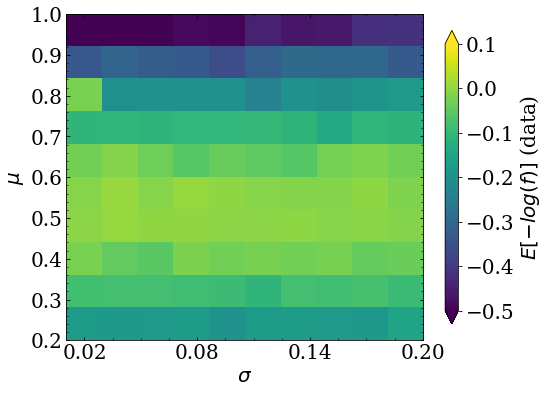

In [625]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

im = plt.imshow(lossval1,origin='lower',extent=[0.01,0.2,0.2,1],aspect='auto',vmin=-0.5,vmax=0.1)
cbar = fig.colorbar(im, extend='both', spacing='proportional', shrink=0.9)
cbar.set_label('$E[-log(f)]$ (data)',fontsize=20)
cbar.ax.tick_params(labelsize=20) 
plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"$\mu$",fontsize=20)
plt.xticks(np.linspace(0.02,0.2,4))

([<matplotlib.axis.XTick at 0x7fe88564c518>,
 <a list of 4 Text xticklabel objects>)

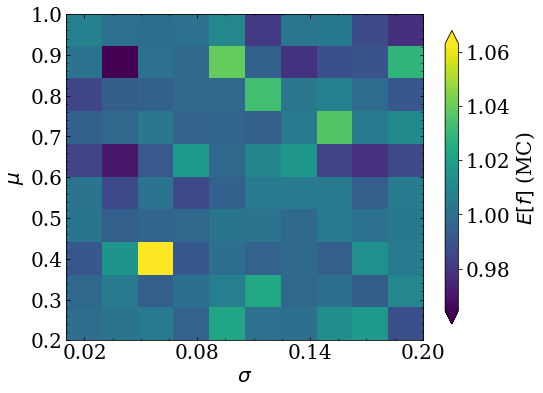

In [626]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

im = plt.imshow(lossval2,origin='lower',extent=[0.01,0.2,0.2,1],aspect='auto')
cbar = fig.colorbar(im, extend='both', spacing='proportional', shrink=0.9)
cbar.set_label('$E[f]$ (MC)',fontsize=20)
cbar.ax.tick_params(labelsize=20) 
plt.xlabel(r"$\sigma$",fontsize=20)
plt.ylabel(r"$\mu$",fontsize=20)
plt.xticks(np.linspace(0.02,0.2,4))

2